In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
data = pd.read_csv('df_combined.csv')

In [3]:
data.head()

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
0,M,CO,VH,B,100.0,100.0,100.0,99.9,100.0,96.1,100.0
1,L,FC,VH,B,100.0,100.0,100.0,99.4,99.6,72.7,98.7
2,L,FC,VH,B,100.0,100.0,98.3,99.9,96.5,75.2,98.4
3,S,CO,VH,B,99.5,85.4,100.0,100.0,93.4,89.2,97.7
4,L,FC,VH,A,100.0,100.0,100.0,78.3,97.4,97.7,95.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Classification_Size          2503 non-null   object 
 1   Classification_Focus         2503 non-null   object 
 2   Research_Intensity           2503 non-null   object 
 3   Status                       2503 non-null   object 
 4   Academic_Reputation_Score    2503 non-null   float64
 5   Employer_Reputation_Score    2503 non-null   float64
 6   Faculty_Student_Score        2503 non-null   float64
 7   Citations_Per_Faculty_Score  2503 non-null   float64
 8   International_Faculty_Score  2503 non-null   float64
 9   International_Student_Score  2503 non-null   float64
 10  Overall_Score                2503 non-null   float64
dtypes: float64(7), object(4)
memory usage: 215.2+ KB


In [5]:
cat_cols = data.select_dtypes(include = 'object')
num_cols= data.select_dtypes(exclude = 'object')

In [6]:
for col in cat_cols:
    print(col)
    print(np.unique(data[col]))

Classification_Size
['L' 'M' 'S' 'XL']
Classification_Focus
['CO' 'FC' 'FO' 'SP']
Research_Intensity
['HI' 'LO' 'MD' 'VH']
Status
['A' 'B' 'C']


In [7]:
encoding = {
    'Classification_Size' : {
        'XL' : 1,
        'L' : 2,
        'M' : 3,
        'S' : 4},
    'Research_Intensity' : {
        'VH' : 1,
        'HI' : 2,
        'MD' : 3,
        'LO' : 4},
    'Status' : {
        'A' : 1,
        'B' : 2,
        'C' : 3}
    }

In [8]:
encoded_cat = data.copy()
for col in cat_cols:
    if col not in list(encoding.keys()):
        val_dict = {v: i for i, v in enumerate(np.unique(data[col]))}
        print(val_dict)
    else:
        val_dict = encoding[col]
    encoded_cat[col] = encoded_cat[col].map(val_dict)

{'CO': 0, 'FC': 1, 'FO': 2, 'SP': 3}


In [9]:
encoded_cat

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
0,3,0,1,2,100.0,100.0,100.0,99.9,100.0,96.1,100.0
1,2,1,1,2,100.0,100.0,100.0,99.4,99.6,72.7,98.7
2,2,1,1,2,100.0,100.0,98.3,99.9,96.5,75.2,98.4
3,4,0,1,2,99.5,85.4,100.0,100.0,93.4,89.2,97.7
4,2,1,1,1,100.0,100.0,100.0,78.3,97.4,97.7,95.6
...,...,...,...,...,...,...,...,...,...,...,...
2498,2,2,1,1,34.9,25.1,28.8,24.6,13.4,47.4,9.1
2499,2,2,1,1,34.6,26.8,26.3,28.8,36.0,2.6,9.0
2500,1,2,1,1,31.9,21.7,34.4,18.9,44.1,7.2,9.0
2501,3,0,2,2,33.3,18.4,39.2,21.9,100.0,40.6,9.0


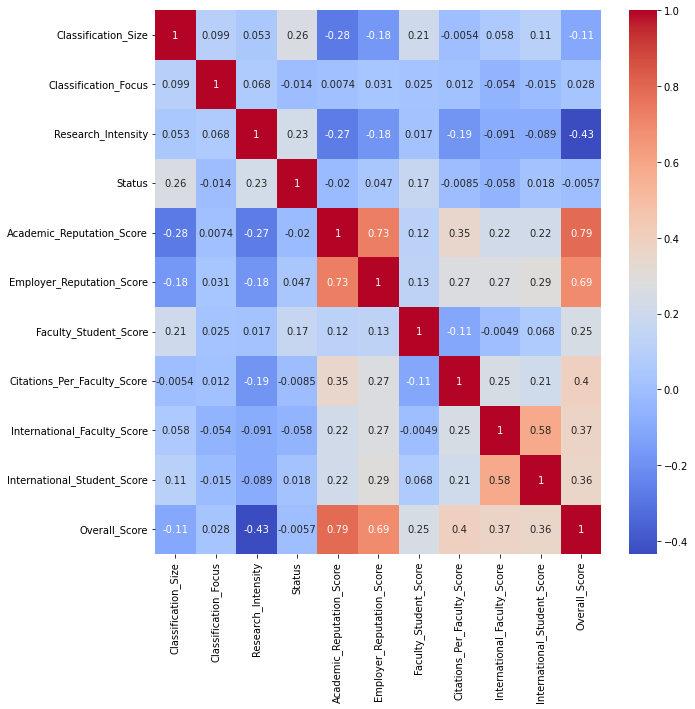

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(encoded_cat.corr(), cmap='coolwarm', annot=True)
plt.show()


In [11]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()
xgb = xgboost.XGBRegressor()
cbt = CatBoostRegressor()
lass= Lasso()
ridge = Ridge()
models = [lr, dt, gb, rf, xgb, cbt, lass, ridge]
names = ['Linear Regression','DecisionTree','GradientBoosting','RandomForest','XGB','CATBOOST','Lasso','Rige']

def evaluate_models(xTrain, yTrain, xVal, yVal):
    random_seed= 0
    scores = []
    for i in range(len(models)):
        model = models[i]
        model.fit(xTrain, yTrain)
        y_predicted = model.predict(xVal)
        mse = mean_squared_error(yVal, y_predicted)
        mae = mean_absolute_error(yVal, y_predicted)
        r_squared = r2_score(yVal, y_predicted)
        scores.append({
            'model':names[i],
            'best_score':model.score(xTrain, yTrain),
            'mean_squared_error':mse,
            'mean_absolute_error':mae,
            'R_Squared': r_squared
        })
    return pd.DataFrame(scores, columns=['model','best_score','mean_squared_error','mean_absolute_error', 'R_Squared'])

In [15]:
def get_cv(X, y):
    scores = []
    for i in range(len(models)):
        model = models[i]
        cv = np.mean(np.absolute(cross_val_score(model, X, y, cv = 5, scoring = 'neg_mean_absolute_error')))
        scores.append({'model' : names[i],
                      'CV' : cv})
    return pd.DataFrame(scores, columns = ['model', 'CV'])

In [16]:
X = encoded_cat.drop(['Overall_Score'], axis = 1)
y = encoded_cat['Overall_Score']

In [17]:
get_cv(X,y)

Learning rate set to 0.045689
0:	learn: 19.0514165	total: 277ms	remaining: 4m 37s
1:	learn: 18.4267225	total: 291ms	remaining: 2m 25s
2:	learn: 17.8746132	total: 305ms	remaining: 1m 41s
3:	learn: 17.3279730	total: 319ms	remaining: 1m 19s
4:	learn: 16.7992607	total: 332ms	remaining: 1m 5s
5:	learn: 16.2739737	total: 344ms	remaining: 57s
6:	learn: 15.7679360	total: 355ms	remaining: 50.3s
7:	learn: 15.3181616	total: 368ms	remaining: 45.7s
8:	learn: 14.8940348	total: 382ms	remaining: 42.1s
9:	learn: 14.5041407	total: 395ms	remaining: 39.1s
10:	learn: 14.1127892	total: 406ms	remaining: 36.5s
11:	learn: 13.7323636	total: 417ms	remaining: 34.4s
12:	learn: 13.3751710	total: 430ms	remaining: 32.7s
13:	learn: 13.0735049	total: 442ms	remaining: 31.1s
14:	learn: 12.7515939	total: 453ms	remaining: 29.7s
15:	learn: 12.4098005	total: 467ms	remaining: 28.7s
16:	learn: 12.1507455	total: 481ms	remaining: 27.8s
17:	learn: 11.8745235	total: 494ms	remaining: 27s
18:	learn: 11.6061830	total: 514ms	remaining

161:	learn: 5.2270342	total: 2.76s	remaining: 14.3s
162:	learn: 5.2214794	total: 2.77s	remaining: 14.2s
163:	learn: 5.2157031	total: 2.78s	remaining: 14.2s
164:	learn: 5.2081320	total: 2.8s	remaining: 14.2s
165:	learn: 5.2014941	total: 2.81s	remaining: 14.1s
166:	learn: 5.1919699	total: 2.82s	remaining: 14.1s
167:	learn: 5.1796320	total: 2.84s	remaining: 14.1s
168:	learn: 5.1728418	total: 2.85s	remaining: 14s
169:	learn: 5.1642677	total: 2.86s	remaining: 14s
170:	learn: 5.1571822	total: 2.87s	remaining: 13.9s
171:	learn: 5.1464969	total: 2.88s	remaining: 13.9s
172:	learn: 5.1362245	total: 2.9s	remaining: 13.8s
173:	learn: 5.1309333	total: 2.9s	remaining: 13.8s
174:	learn: 5.1237700	total: 2.92s	remaining: 13.8s
175:	learn: 5.1179080	total: 2.93s	remaining: 13.7s
176:	learn: 5.1082074	total: 2.95s	remaining: 13.7s
177:	learn: 5.1044672	total: 2.97s	remaining: 13.7s
178:	learn: 5.1001810	total: 2.98s	remaining: 13.7s
179:	learn: 5.0975020	total: 3s	remaining: 13.7s
180:	learn: 5.0908326	

326:	learn: 4.2051643	total: 4.88s	remaining: 10s
327:	learn: 4.2026635	total: 4.89s	remaining: 10s
328:	learn: 4.1956338	total: 4.9s	remaining: 10s
329:	learn: 4.1897291	total: 4.91s	remaining: 9.98s
330:	learn: 4.1862577	total: 4.93s	remaining: 9.96s
331:	learn: 4.1827212	total: 4.94s	remaining: 9.94s
332:	learn: 4.1758962	total: 4.95s	remaining: 9.92s
333:	learn: 4.1723094	total: 4.96s	remaining: 9.9s
334:	learn: 4.1693840	total: 4.97s	remaining: 9.87s
335:	learn: 4.1644226	total: 4.98s	remaining: 9.85s
336:	learn: 4.1604907	total: 5s	remaining: 9.83s
337:	learn: 4.1558075	total: 5.01s	remaining: 9.81s
338:	learn: 4.1513022	total: 5.02s	remaining: 9.78s
339:	learn: 4.1426837	total: 5.03s	remaining: 9.76s
340:	learn: 4.1371104	total: 5.04s	remaining: 9.74s
341:	learn: 4.1338530	total: 5.05s	remaining: 9.71s
342:	learn: 4.1295490	total: 5.06s	remaining: 9.7s
343:	learn: 4.1244579	total: 5.07s	remaining: 9.67s
344:	learn: 4.1215611	total: 5.09s	remaining: 9.66s
345:	learn: 4.1163309	to

490:	learn: 3.5384273	total: 6.78s	remaining: 7.03s
491:	learn: 3.5328697	total: 6.79s	remaining: 7.01s
492:	learn: 3.5302787	total: 6.8s	remaining: 7s
493:	learn: 3.5273671	total: 6.81s	remaining: 6.98s
494:	learn: 3.5250098	total: 6.83s	remaining: 6.96s
495:	learn: 3.5228832	total: 6.84s	remaining: 6.95s
496:	learn: 3.5192240	total: 6.85s	remaining: 6.93s
497:	learn: 3.5160903	total: 6.87s	remaining: 6.92s
498:	learn: 3.5120923	total: 6.88s	remaining: 6.9s
499:	learn: 3.5097743	total: 6.89s	remaining: 6.89s
500:	learn: 3.5085096	total: 6.9s	remaining: 6.87s
501:	learn: 3.5034984	total: 6.91s	remaining: 6.85s
502:	learn: 3.4996733	total: 6.92s	remaining: 6.84s
503:	learn: 3.4968626	total: 6.93s	remaining: 6.82s
504:	learn: 3.4955346	total: 6.94s	remaining: 6.8s
505:	learn: 3.4925900	total: 6.95s	remaining: 6.79s
506:	learn: 3.4903483	total: 6.96s	remaining: 6.77s
507:	learn: 3.4875897	total: 6.97s	remaining: 6.75s
508:	learn: 3.4854488	total: 6.99s	remaining: 6.74s
509:	learn: 3.48393

660:	learn: 3.0802052	total: 8.86s	remaining: 4.54s
661:	learn: 3.0782076	total: 8.87s	remaining: 4.53s
662:	learn: 3.0755104	total: 8.89s	remaining: 4.52s
663:	learn: 3.0736918	total: 8.9s	remaining: 4.51s
664:	learn: 3.0715204	total: 8.92s	remaining: 4.49s
665:	learn: 3.0704876	total: 8.94s	remaining: 4.48s
666:	learn: 3.0665176	total: 8.95s	remaining: 4.47s
667:	learn: 3.0655126	total: 8.97s	remaining: 4.46s
668:	learn: 3.0621112	total: 8.98s	remaining: 4.44s
669:	learn: 3.0603844	total: 8.99s	remaining: 4.43s
670:	learn: 3.0583727	total: 9.01s	remaining: 4.42s
671:	learn: 3.0558272	total: 9.02s	remaining: 4.4s
672:	learn: 3.0534447	total: 9.03s	remaining: 4.39s
673:	learn: 3.0525236	total: 9.05s	remaining: 4.38s
674:	learn: 3.0519763	total: 9.07s	remaining: 4.37s
675:	learn: 3.0497438	total: 9.09s	remaining: 4.36s
676:	learn: 3.0469842	total: 9.1s	remaining: 4.34s
677:	learn: 3.0457523	total: 9.11s	remaining: 4.33s
678:	learn: 3.0442393	total: 9.12s	remaining: 4.31s
679:	learn: 3.0

823:	learn: 2.7585306	total: 11.2s	remaining: 2.39s
824:	learn: 2.7565316	total: 11.2s	remaining: 2.37s
825:	learn: 2.7559811	total: 11.2s	remaining: 2.36s
826:	learn: 2.7546305	total: 11.2s	remaining: 2.35s
827:	learn: 2.7535295	total: 11.2s	remaining: 2.34s
828:	learn: 2.7529246	total: 11.3s	remaining: 2.32s
829:	learn: 2.7503530	total: 11.3s	remaining: 2.31s
830:	learn: 2.7468780	total: 11.3s	remaining: 2.3s
831:	learn: 2.7452545	total: 11.3s	remaining: 2.28s
832:	learn: 2.7438148	total: 11.3s	remaining: 2.27s
833:	learn: 2.7423026	total: 11.3s	remaining: 2.25s
834:	learn: 2.7396576	total: 11.3s	remaining: 2.24s
835:	learn: 2.7379796	total: 11.4s	remaining: 2.23s
836:	learn: 2.7361199	total: 11.4s	remaining: 2.21s
837:	learn: 2.7338935	total: 11.4s	remaining: 2.2s
838:	learn: 2.7317673	total: 11.4s	remaining: 2.19s
839:	learn: 2.7296222	total: 11.4s	remaining: 2.18s
840:	learn: 2.7289165	total: 11.4s	remaining: 2.16s
841:	learn: 2.7271402	total: 11.5s	remaining: 2.15s
842:	learn: 2.

984:	learn: 2.5011490	total: 13.5s	remaining: 205ms
985:	learn: 2.4997927	total: 13.5s	remaining: 192ms
986:	learn: 2.4993271	total: 13.5s	remaining: 178ms
987:	learn: 2.4984455	total: 13.5s	remaining: 164ms
988:	learn: 2.4975506	total: 13.5s	remaining: 151ms
989:	learn: 2.4961701	total: 13.6s	remaining: 137ms
990:	learn: 2.4956211	total: 13.6s	remaining: 123ms
991:	learn: 2.4930418	total: 13.6s	remaining: 110ms
992:	learn: 2.4914035	total: 13.6s	remaining: 95.9ms
993:	learn: 2.4896662	total: 13.6s	remaining: 82.2ms
994:	learn: 2.4884254	total: 13.6s	remaining: 68.5ms
995:	learn: 2.4855172	total: 13.6s	remaining: 54.8ms
996:	learn: 2.4826662	total: 13.7s	remaining: 41.1ms
997:	learn: 2.4814470	total: 13.7s	remaining: 27.4ms
998:	learn: 2.4800461	total: 13.7s	remaining: 13.7ms
999:	learn: 2.4787320	total: 13.7s	remaining: 0us
Learning rate set to 0.045689
0:	learn: 19.5770459	total: 11.9ms	remaining: 11.9s
1:	learn: 18.9291503	total: 23.6ms	remaining: 11.8s
2:	learn: 18.3405364	total: 3

153:	learn: 5.4671883	total: 2.03s	remaining: 11.2s
154:	learn: 5.4583095	total: 2.05s	remaining: 11.2s
155:	learn: 5.4481619	total: 2.06s	remaining: 11.1s
156:	learn: 5.4398293	total: 2.07s	remaining: 11.1s
157:	learn: 5.4299220	total: 2.08s	remaining: 11.1s
158:	learn: 5.4219260	total: 2.1s	remaining: 11.1s
159:	learn: 5.4117987	total: 2.11s	remaining: 11.1s
160:	learn: 5.4049062	total: 2.13s	remaining: 11.1s
161:	learn: 5.4005612	total: 2.14s	remaining: 11.1s
162:	learn: 5.3886982	total: 2.16s	remaining: 11.1s
163:	learn: 5.3785815	total: 2.17s	remaining: 11.1s
164:	learn: 5.3656093	total: 2.18s	remaining: 11s
165:	learn: 5.3567090	total: 2.19s	remaining: 11s
166:	learn: 5.3429533	total: 2.2s	remaining: 11s
167:	learn: 5.3312253	total: 2.22s	remaining: 11s
168:	learn: 5.3219636	total: 2.24s	remaining: 11s
169:	learn: 5.3112132	total: 2.25s	remaining: 11s
170:	learn: 5.3054418	total: 2.27s	remaining: 11s
171:	learn: 5.2971098	total: 2.29s	remaining: 11s
172:	learn: 5.2867070	total: 2

326:	learn: 4.4052588	total: 4.34s	remaining: 8.93s
327:	learn: 4.3980693	total: 4.35s	remaining: 8.91s
328:	learn: 4.3941420	total: 4.36s	remaining: 8.9s
329:	learn: 4.3879091	total: 4.38s	remaining: 8.88s
330:	learn: 4.3853154	total: 4.39s	remaining: 8.87s
331:	learn: 4.3818568	total: 4.4s	remaining: 8.85s
332:	learn: 4.3775676	total: 4.41s	remaining: 8.84s
333:	learn: 4.3727490	total: 4.43s	remaining: 8.83s
334:	learn: 4.3689311	total: 4.45s	remaining: 8.83s
335:	learn: 4.3643625	total: 4.46s	remaining: 8.81s
336:	learn: 4.3616568	total: 4.47s	remaining: 8.79s
337:	learn: 4.3553896	total: 4.48s	remaining: 8.77s
338:	learn: 4.3494102	total: 4.49s	remaining: 8.76s
339:	learn: 4.3460366	total: 4.5s	remaining: 8.74s
340:	learn: 4.3390616	total: 4.51s	remaining: 8.72s
341:	learn: 4.3346853	total: 4.52s	remaining: 8.7s
342:	learn: 4.3315892	total: 4.54s	remaining: 8.69s
343:	learn: 4.3273562	total: 4.55s	remaining: 8.68s
344:	learn: 4.3231909	total: 4.56s	remaining: 8.66s
345:	learn: 4.31

491:	learn: 3.7878626	total: 6.42s	remaining: 6.63s
492:	learn: 3.7835377	total: 6.44s	remaining: 6.62s
493:	learn: 3.7821272	total: 6.46s	remaining: 6.62s
494:	learn: 3.7799443	total: 6.5s	remaining: 6.63s
495:	learn: 3.7782300	total: 6.55s	remaining: 6.66s
496:	learn: 3.7769894	total: 6.58s	remaining: 6.66s
497:	learn: 3.7742311	total: 6.61s	remaining: 6.66s
498:	learn: 3.7728724	total: 6.62s	remaining: 6.65s
499:	learn: 3.7685709	total: 6.65s	remaining: 6.65s
500:	learn: 3.7657396	total: 6.67s	remaining: 6.64s
501:	learn: 3.7609164	total: 6.68s	remaining: 6.63s
502:	learn: 3.7569954	total: 6.7s	remaining: 6.62s
503:	learn: 3.7541950	total: 6.71s	remaining: 6.61s
504:	learn: 3.7496549	total: 6.72s	remaining: 6.59s
505:	learn: 3.7466053	total: 6.74s	remaining: 6.58s
506:	learn: 3.7426080	total: 6.76s	remaining: 6.58s
507:	learn: 3.7395071	total: 6.79s	remaining: 6.58s
508:	learn: 3.7368795	total: 6.85s	remaining: 6.61s
509:	learn: 3.7328908	total: 6.91s	remaining: 6.63s
510:	learn: 3.

661:	learn: 3.3389295	total: 9.02s	remaining: 4.61s
662:	learn: 3.3377854	total: 9.07s	remaining: 4.61s
663:	learn: 3.3363628	total: 9.11s	remaining: 4.61s
664:	learn: 3.3352573	total: 9.13s	remaining: 4.6s
665:	learn: 3.3335146	total: 9.15s	remaining: 4.59s
666:	learn: 3.3319916	total: 9.16s	remaining: 4.58s
667:	learn: 3.3297791	total: 9.19s	remaining: 4.57s
668:	learn: 3.3275681	total: 9.21s	remaining: 4.55s
669:	learn: 3.3238257	total: 9.23s	remaining: 4.54s
670:	learn: 3.3199959	total: 9.25s	remaining: 4.54s
671:	learn: 3.3180906	total: 9.26s	remaining: 4.52s
672:	learn: 3.3155349	total: 9.27s	remaining: 4.5s
673:	learn: 3.3128054	total: 9.29s	remaining: 4.49s
674:	learn: 3.3098180	total: 9.3s	remaining: 4.48s
675:	learn: 3.3054429	total: 9.31s	remaining: 4.46s
676:	learn: 3.3037099	total: 9.33s	remaining: 4.45s
677:	learn: 3.3029939	total: 9.34s	remaining: 4.44s
678:	learn: 3.2982806	total: 9.36s	remaining: 4.42s
679:	learn: 3.2967831	total: 9.37s	remaining: 4.41s
680:	learn: 3.2

830:	learn: 2.9851362	total: 11.7s	remaining: 2.38s
831:	learn: 2.9836341	total: 11.7s	remaining: 2.37s
832:	learn: 2.9818953	total: 11.7s	remaining: 2.35s
833:	learn: 2.9794302	total: 11.7s	remaining: 2.34s
834:	learn: 2.9784325	total: 11.8s	remaining: 2.33s
835:	learn: 2.9762397	total: 11.8s	remaining: 2.31s
836:	learn: 2.9734073	total: 11.8s	remaining: 2.3s
837:	learn: 2.9720310	total: 11.8s	remaining: 2.29s
838:	learn: 2.9709896	total: 11.8s	remaining: 2.27s
839:	learn: 2.9694633	total: 11.9s	remaining: 2.26s
840:	learn: 2.9684859	total: 11.9s	remaining: 2.25s
841:	learn: 2.9657710	total: 11.9s	remaining: 2.23s
842:	learn: 2.9618409	total: 11.9s	remaining: 2.22s
843:	learn: 2.9604971	total: 11.9s	remaining: 2.21s
844:	learn: 2.9578208	total: 11.9s	remaining: 2.19s
845:	learn: 2.9562705	total: 12s	remaining: 2.18s
846:	learn: 2.9552847	total: 12s	remaining: 2.16s
847:	learn: 2.9536695	total: 12s	remaining: 2.15s
848:	learn: 2.9522236	total: 12s	remaining: 2.14s
849:	learn: 2.9483983

994:	learn: 2.7076543	total: 14.4s	remaining: 72.5ms
995:	learn: 2.7060281	total: 14.4s	remaining: 58ms
996:	learn: 2.7042365	total: 14.5s	remaining: 43.5ms
997:	learn: 2.7033067	total: 14.5s	remaining: 29ms
998:	learn: 2.7023944	total: 14.5s	remaining: 14.5ms
999:	learn: 2.7013358	total: 14.5s	remaining: 0us
Learning rate set to 0.045689
0:	learn: 19.8655453	total: 12.9ms	remaining: 12.9s
1:	learn: 19.1616447	total: 25.4ms	remaining: 12.7s
2:	learn: 18.5072678	total: 39.6ms	remaining: 13.2s
3:	learn: 17.8672062	total: 51ms	remaining: 12.7s
4:	learn: 17.2525581	total: 64ms	remaining: 12.7s
5:	learn: 16.6518867	total: 76.9ms	remaining: 12.7s
6:	learn: 16.0856039	total: 89.6ms	remaining: 12.7s
7:	learn: 15.5865811	total: 102ms	remaining: 12.7s
8:	learn: 15.0825332	total: 115ms	remaining: 12.6s
9:	learn: 14.5732372	total: 126ms	remaining: 12.5s
10:	learn: 14.1407349	total: 138ms	remaining: 12.4s
11:	learn: 13.6851659	total: 156ms	remaining: 12.9s
12:	learn: 13.2653026	total: 173ms	remaini

163:	learn: 3.9209297	total: 2.46s	remaining: 12.6s
164:	learn: 3.9107418	total: 2.48s	remaining: 12.5s
165:	learn: 3.8996534	total: 2.5s	remaining: 12.5s
166:	learn: 3.8928915	total: 2.51s	remaining: 12.5s
167:	learn: 3.8799973	total: 2.53s	remaining: 12.5s
168:	learn: 3.8745283	total: 2.55s	remaining: 12.5s
169:	learn: 3.8678421	total: 2.56s	remaining: 12.5s
170:	learn: 3.8630542	total: 2.57s	remaining: 12.5s
171:	learn: 3.8537121	total: 2.59s	remaining: 12.5s
172:	learn: 3.8482747	total: 2.6s	remaining: 12.4s
173:	learn: 3.8420116	total: 2.61s	remaining: 12.4s
174:	learn: 3.8377481	total: 2.62s	remaining: 12.4s
175:	learn: 3.8302671	total: 2.64s	remaining: 12.3s
176:	learn: 3.8242792	total: 2.65s	remaining: 12.3s
177:	learn: 3.8153063	total: 2.67s	remaining: 12.3s
178:	learn: 3.8123662	total: 2.69s	remaining: 12.4s
179:	learn: 3.8074915	total: 2.71s	remaining: 12.4s
180:	learn: 3.8010991	total: 2.72s	remaining: 12.3s
181:	learn: 3.7939950	total: 2.73s	remaining: 12.3s
182:	learn: 3.

323:	learn: 3.0906842	total: 4.75s	remaining: 9.9s
324:	learn: 3.0881851	total: 4.76s	remaining: 9.89s
325:	learn: 3.0862178	total: 4.78s	remaining: 9.88s
326:	learn: 3.0840038	total: 4.79s	remaining: 9.87s
327:	learn: 3.0807344	total: 4.81s	remaining: 9.86s
328:	learn: 3.0741174	total: 4.83s	remaining: 9.84s
329:	learn: 3.0693083	total: 4.84s	remaining: 9.84s
330:	learn: 3.0650453	total: 4.86s	remaining: 9.81s
331:	learn: 3.0622232	total: 4.87s	remaining: 9.79s
332:	learn: 3.0584393	total: 4.88s	remaining: 9.77s
333:	learn: 3.0542266	total: 4.89s	remaining: 9.76s
334:	learn: 3.0524703	total: 4.9s	remaining: 9.73s
335:	learn: 3.0483899	total: 4.92s	remaining: 9.71s
336:	learn: 3.0449474	total: 4.93s	remaining: 9.71s
337:	learn: 3.0423224	total: 4.95s	remaining: 9.7s
338:	learn: 3.0388191	total: 4.97s	remaining: 9.69s
339:	learn: 3.0350182	total: 4.99s	remaining: 9.68s
340:	learn: 3.0322823	total: 5s	remaining: 9.66s
341:	learn: 3.0268761	total: 5.01s	remaining: 9.65s
342:	learn: 3.0238

484:	learn: 2.5932322	total: 6.78s	remaining: 7.2s
485:	learn: 2.5920678	total: 6.79s	remaining: 7.18s
486:	learn: 2.5898888	total: 6.81s	remaining: 7.17s
487:	learn: 2.5858508	total: 6.82s	remaining: 7.16s
488:	learn: 2.5831237	total: 6.83s	remaining: 7.14s
489:	learn: 2.5809949	total: 6.84s	remaining: 7.12s
490:	learn: 2.5749540	total: 6.86s	remaining: 7.11s
491:	learn: 2.5716584	total: 6.87s	remaining: 7.1s
492:	learn: 2.5700252	total: 6.89s	remaining: 7.08s
493:	learn: 2.5665490	total: 6.9s	remaining: 7.07s
494:	learn: 2.5634713	total: 6.91s	remaining: 7.05s
495:	learn: 2.5613842	total: 6.92s	remaining: 7.03s
496:	learn: 2.5601373	total: 6.93s	remaining: 7.02s
497:	learn: 2.5572108	total: 6.94s	remaining: 7s
498:	learn: 2.5556665	total: 6.96s	remaining: 6.98s
499:	learn: 2.5538454	total: 6.97s	remaining: 6.97s
500:	learn: 2.5500993	total: 6.98s	remaining: 6.95s
501:	learn: 2.5487176	total: 7s	remaining: 6.94s
502:	learn: 2.5435268	total: 7.01s	remaining: 6.92s
503:	learn: 2.5402649

653:	learn: 2.2350758	total: 8.81s	remaining: 4.66s
654:	learn: 2.2318056	total: 8.82s	remaining: 4.65s
655:	learn: 2.2305080	total: 8.84s	remaining: 4.63s
656:	learn: 2.2287743	total: 8.85s	remaining: 4.62s
657:	learn: 2.2265765	total: 8.86s	remaining: 4.61s
658:	learn: 2.2238567	total: 8.87s	remaining: 4.59s
659:	learn: 2.2223840	total: 8.89s	remaining: 4.58s
660:	learn: 2.2213036	total: 8.9s	remaining: 4.56s
661:	learn: 2.2190224	total: 8.91s	remaining: 4.55s
662:	learn: 2.2175472	total: 8.92s	remaining: 4.54s
663:	learn: 2.2156830	total: 8.93s	remaining: 4.52s
664:	learn: 2.2144337	total: 8.94s	remaining: 4.5s
665:	learn: 2.2135423	total: 8.95s	remaining: 4.49s
666:	learn: 2.2116968	total: 8.96s	remaining: 4.48s
667:	learn: 2.2104530	total: 8.98s	remaining: 4.46s
668:	learn: 2.2090583	total: 8.99s	remaining: 4.45s
669:	learn: 2.2081287	total: 9s	remaining: 4.43s
670:	learn: 2.2060597	total: 9.03s	remaining: 4.42s
671:	learn: 2.2041683	total: 9.05s	remaining: 4.42s
672:	learn: 2.201

812:	learn: 1.9938080	total: 11.1s	remaining: 2.55s
813:	learn: 1.9929265	total: 11.1s	remaining: 2.54s
814:	learn: 1.9906718	total: 11.1s	remaining: 2.53s
815:	learn: 1.9889234	total: 11.1s	remaining: 2.51s
816:	learn: 1.9880793	total: 11.2s	remaining: 2.5s
817:	learn: 1.9866003	total: 11.2s	remaining: 2.49s
818:	learn: 1.9848306	total: 11.2s	remaining: 2.47s
819:	learn: 1.9842495	total: 11.2s	remaining: 2.46s
820:	learn: 1.9837412	total: 11.2s	remaining: 2.45s
821:	learn: 1.9812208	total: 11.2s	remaining: 2.43s
822:	learn: 1.9796195	total: 11.3s	remaining: 2.42s
823:	learn: 1.9775078	total: 11.3s	remaining: 2.41s
824:	learn: 1.9765282	total: 11.3s	remaining: 2.39s
825:	learn: 1.9748339	total: 11.3s	remaining: 2.38s
826:	learn: 1.9739443	total: 11.3s	remaining: 2.37s
827:	learn: 1.9732231	total: 11.3s	remaining: 2.35s
828:	learn: 1.9722521	total: 11.4s	remaining: 2.34s
829:	learn: 1.9714987	total: 11.4s	remaining: 2.33s
830:	learn: 1.9701036	total: 11.4s	remaining: 2.31s
831:	learn: 1

971:	learn: 1.7812883	total: 13.4s	remaining: 385ms
972:	learn: 1.7803160	total: 13.4s	remaining: 372ms
973:	learn: 1.7795062	total: 13.4s	remaining: 358ms
974:	learn: 1.7791108	total: 13.4s	remaining: 344ms
975:	learn: 1.7780907	total: 13.4s	remaining: 331ms
976:	learn: 1.7776127	total: 13.5s	remaining: 317ms
977:	learn: 1.7767836	total: 13.5s	remaining: 303ms
978:	learn: 1.7758006	total: 13.5s	remaining: 289ms
979:	learn: 1.7747919	total: 13.5s	remaining: 276ms
980:	learn: 1.7742095	total: 13.5s	remaining: 262ms
981:	learn: 1.7726721	total: 13.5s	remaining: 248ms
982:	learn: 1.7712285	total: 13.5s	remaining: 234ms
983:	learn: 1.7702758	total: 13.5s	remaining: 220ms
984:	learn: 1.7693853	total: 13.6s	remaining: 207ms
985:	learn: 1.7672545	total: 13.6s	remaining: 193ms
986:	learn: 1.7664558	total: 13.6s	remaining: 179ms
987:	learn: 1.7657885	total: 13.6s	remaining: 165ms
988:	learn: 1.7649967	total: 13.6s	remaining: 152ms
989:	learn: 1.7633319	total: 13.6s	remaining: 138ms
990:	learn: 

140:	learn: 5.5489154	total: 1.69s	remaining: 10.3s
141:	learn: 5.5391018	total: 1.7s	remaining: 10.3s
142:	learn: 5.5351312	total: 1.72s	remaining: 10.3s
143:	learn: 5.5262207	total: 1.73s	remaining: 10.3s
144:	learn: 5.5209672	total: 1.74s	remaining: 10.3s
145:	learn: 5.5142422	total: 1.75s	remaining: 10.2s
146:	learn: 5.5082521	total: 1.76s	remaining: 10.2s
147:	learn: 5.4994206	total: 1.78s	remaining: 10.2s
148:	learn: 5.4906751	total: 1.79s	remaining: 10.2s
149:	learn: 5.4790239	total: 1.8s	remaining: 10.2s
150:	learn: 5.4705453	total: 1.81s	remaining: 10.2s
151:	learn: 5.4637678	total: 1.82s	remaining: 10.2s
152:	learn: 5.4593184	total: 1.83s	remaining: 10.1s
153:	learn: 5.4480112	total: 1.84s	remaining: 10.1s
154:	learn: 5.4431192	total: 1.85s	remaining: 10.1s
155:	learn: 5.4388374	total: 1.86s	remaining: 10.1s
156:	learn: 5.4302137	total: 1.88s	remaining: 10.1s
157:	learn: 5.4243924	total: 1.89s	remaining: 10.1s
158:	learn: 5.4163091	total: 1.9s	remaining: 10.1s
159:	learn: 5.4

303:	learn: 4.4897758	total: 3.59s	remaining: 8.21s
304:	learn: 4.4853109	total: 3.6s	remaining: 8.2s
305:	learn: 4.4828256	total: 3.61s	remaining: 8.19s
306:	learn: 4.4757263	total: 3.62s	remaining: 8.18s
307:	learn: 4.4682670	total: 3.63s	remaining: 8.17s
308:	learn: 4.4629434	total: 3.65s	remaining: 8.16s
309:	learn: 4.4587707	total: 3.66s	remaining: 8.15s
310:	learn: 4.4522760	total: 3.67s	remaining: 8.14s
311:	learn: 4.4469375	total: 3.69s	remaining: 8.13s
312:	learn: 4.4403055	total: 3.7s	remaining: 8.11s
313:	learn: 4.4333898	total: 3.71s	remaining: 8.1s
314:	learn: 4.4287729	total: 3.72s	remaining: 8.09s
315:	learn: 4.4252861	total: 3.73s	remaining: 8.07s
316:	learn: 4.4185437	total: 3.74s	remaining: 8.06s
317:	learn: 4.4109701	total: 3.75s	remaining: 8.04s
318:	learn: 4.4056728	total: 3.76s	remaining: 8.03s
319:	learn: 4.3981418	total: 3.77s	remaining: 8.02s
320:	learn: 4.3963920	total: 3.79s	remaining: 8.01s
321:	learn: 4.3940877	total: 3.8s	remaining: 8.01s
322:	learn: 4.389

473:	learn: 3.8130915	total: 5.66s	remaining: 6.28s
474:	learn: 3.8080048	total: 5.67s	remaining: 6.27s
475:	learn: 3.8020503	total: 5.68s	remaining: 6.26s
476:	learn: 3.7975885	total: 5.7s	remaining: 6.25s
477:	learn: 3.7932420	total: 5.71s	remaining: 6.24s
478:	learn: 3.7882586	total: 5.72s	remaining: 6.22s
479:	learn: 3.7865217	total: 5.74s	remaining: 6.21s
480:	learn: 3.7811928	total: 5.75s	remaining: 6.2s
481:	learn: 3.7787901	total: 5.76s	remaining: 6.19s
482:	learn: 3.7756129	total: 5.77s	remaining: 6.18s
483:	learn: 3.7743817	total: 5.79s	remaining: 6.17s
484:	learn: 3.7699356	total: 5.8s	remaining: 6.15s
485:	learn: 3.7679338	total: 5.81s	remaining: 6.14s
486:	learn: 3.7652328	total: 5.82s	remaining: 6.13s
487:	learn: 3.7622435	total: 5.83s	remaining: 6.11s
488:	learn: 3.7597629	total: 5.84s	remaining: 6.1s
489:	learn: 3.7547253	total: 5.85s	remaining: 6.09s
490:	learn: 3.7518174	total: 5.87s	remaining: 6.08s
491:	learn: 3.7493444	total: 5.88s	remaining: 6.07s
492:	learn: 3.74

634:	learn: 3.3569697	total: 7.54s	remaining: 4.34s
635:	learn: 3.3561414	total: 7.56s	remaining: 4.32s
636:	learn: 3.3548129	total: 7.57s	remaining: 4.31s
637:	learn: 3.3513793	total: 7.58s	remaining: 4.3s
638:	learn: 3.3473151	total: 7.59s	remaining: 4.29s
639:	learn: 3.3451186	total: 7.61s	remaining: 4.28s
640:	learn: 3.3430655	total: 7.62s	remaining: 4.27s
641:	learn: 3.3414966	total: 7.63s	remaining: 4.26s
642:	learn: 3.3379262	total: 7.65s	remaining: 4.25s
643:	learn: 3.3368469	total: 7.66s	remaining: 4.23s
644:	learn: 3.3338800	total: 7.67s	remaining: 4.22s
645:	learn: 3.3326677	total: 7.68s	remaining: 4.21s
646:	learn: 3.3296941	total: 7.69s	remaining: 4.2s
647:	learn: 3.3260062	total: 7.7s	remaining: 4.18s
648:	learn: 3.3226285	total: 7.71s	remaining: 4.17s
649:	learn: 3.3205475	total: 7.72s	remaining: 4.16s
650:	learn: 3.3171926	total: 7.74s	remaining: 4.15s
651:	learn: 3.3155695	total: 7.75s	remaining: 4.13s
652:	learn: 3.3130010	total: 7.76s	remaining: 4.12s
653:	learn: 3.3

805:	learn: 2.9995625	total: 9.55s	remaining: 2.3s
806:	learn: 2.9974314	total: 9.57s	remaining: 2.29s
807:	learn: 2.9962033	total: 9.58s	remaining: 2.28s
808:	learn: 2.9952067	total: 9.6s	remaining: 2.27s
809:	learn: 2.9939952	total: 9.61s	remaining: 2.25s
810:	learn: 2.9916089	total: 9.62s	remaining: 2.24s
811:	learn: 2.9901040	total: 9.63s	remaining: 2.23s
812:	learn: 2.9888998	total: 9.65s	remaining: 2.22s
813:	learn: 2.9871782	total: 9.66s	remaining: 2.21s
814:	learn: 2.9853846	total: 9.67s	remaining: 2.19s
815:	learn: 2.9842943	total: 9.68s	remaining: 2.18s
816:	learn: 2.9812270	total: 9.69s	remaining: 2.17s
817:	learn: 2.9784554	total: 9.7s	remaining: 2.16s
818:	learn: 2.9765797	total: 9.71s	remaining: 2.15s
819:	learn: 2.9743462	total: 9.72s	remaining: 2.13s
820:	learn: 2.9736288	total: 9.73s	remaining: 2.12s
821:	learn: 2.9725017	total: 9.76s	remaining: 2.11s
822:	learn: 2.9714984	total: 9.79s	remaining: 2.1s
823:	learn: 2.9680728	total: 9.8s	remaining: 2.09s
824:	learn: 2.967

970:	learn: 2.7141615	total: 12s	remaining: 357ms
971:	learn: 2.7119351	total: 12s	remaining: 345ms
972:	learn: 2.7096538	total: 12s	remaining: 333ms
973:	learn: 2.7085472	total: 12s	remaining: 321ms
974:	learn: 2.7069228	total: 12s	remaining: 308ms
975:	learn: 2.7049184	total: 12s	remaining: 296ms
976:	learn: 2.7034172	total: 12.1s	remaining: 284ms
977:	learn: 2.7013858	total: 12.1s	remaining: 272ms
978:	learn: 2.6978505	total: 12.1s	remaining: 259ms
979:	learn: 2.6965846	total: 12.1s	remaining: 247ms
980:	learn: 2.6941895	total: 12.1s	remaining: 235ms
981:	learn: 2.6909303	total: 12.1s	remaining: 222ms
982:	learn: 2.6898310	total: 12.1s	remaining: 210ms
983:	learn: 2.6886448	total: 12.2s	remaining: 198ms
984:	learn: 2.6859845	total: 12.2s	remaining: 185ms
985:	learn: 2.6853751	total: 12.2s	remaining: 173ms
986:	learn: 2.6845880	total: 12.2s	remaining: 161ms
987:	learn: 2.6827183	total: 12.2s	remaining: 148ms
988:	learn: 2.6816998	total: 12.2s	remaining: 136ms
989:	learn: 2.6791246	to

137:	learn: 5.2448071	total: 2.35s	remaining: 14.7s
138:	learn: 5.2355952	total: 2.36s	remaining: 14.6s
139:	learn: 5.2283698	total: 2.38s	remaining: 14.6s
140:	learn: 5.2216329	total: 2.39s	remaining: 14.6s
141:	learn: 5.2121035	total: 2.41s	remaining: 14.6s
142:	learn: 5.1996271	total: 2.42s	remaining: 14.5s
143:	learn: 5.1936768	total: 2.44s	remaining: 14.5s
144:	learn: 5.1701482	total: 2.46s	remaining: 14.5s
145:	learn: 5.1589909	total: 2.47s	remaining: 14.4s
146:	learn: 5.1496066	total: 2.48s	remaining: 14.4s
147:	learn: 5.1410750	total: 2.5s	remaining: 14.4s
148:	learn: 5.1272672	total: 2.51s	remaining: 14.3s
149:	learn: 5.1231746	total: 2.52s	remaining: 14.3s
150:	learn: 5.1146005	total: 2.54s	remaining: 14.3s
151:	learn: 5.1030739	total: 2.56s	remaining: 14.3s
152:	learn: 5.0969936	total: 2.58s	remaining: 14.3s
153:	learn: 5.0911656	total: 2.6s	remaining: 14.3s
154:	learn: 5.0846484	total: 2.61s	remaining: 14.2s
155:	learn: 5.0711973	total: 2.62s	remaining: 14.2s
156:	learn: 5.

305:	learn: 3.9869788	total: 4.45s	remaining: 10.1s
306:	learn: 3.9805235	total: 4.46s	remaining: 10.1s
307:	learn: 3.9732251	total: 4.47s	remaining: 10s
308:	learn: 3.9695279	total: 4.48s	remaining: 10s
309:	learn: 3.9635811	total: 4.5s	remaining: 10s
310:	learn: 3.9547649	total: 4.51s	remaining: 9.98s
311:	learn: 3.9504333	total: 4.52s	remaining: 9.96s
312:	learn: 3.9471404	total: 4.53s	remaining: 9.95s
313:	learn: 3.9424931	total: 4.55s	remaining: 9.93s
314:	learn: 3.9392745	total: 4.56s	remaining: 9.91s
315:	learn: 3.9352226	total: 4.57s	remaining: 9.89s
316:	learn: 3.9306510	total: 4.58s	remaining: 9.87s
317:	learn: 3.9263504	total: 4.59s	remaining: 9.85s
318:	learn: 3.9218047	total: 4.6s	remaining: 9.83s
319:	learn: 3.9191078	total: 4.61s	remaining: 9.8s
320:	learn: 3.9138384	total: 4.63s	remaining: 9.79s
321:	learn: 3.9116932	total: 4.64s	remaining: 9.77s
322:	learn: 3.9079528	total: 4.65s	remaining: 9.75s
323:	learn: 3.9035495	total: 4.67s	remaining: 9.73s
324:	learn: 3.8976146

475:	learn: 3.2913558	total: 6.5s	remaining: 7.15s
476:	learn: 3.2855855	total: 6.51s	remaining: 7.13s
477:	learn: 3.2798208	total: 6.52s	remaining: 7.12s
478:	learn: 3.2779436	total: 6.53s	remaining: 7.11s
479:	learn: 3.2744517	total: 6.55s	remaining: 7.09s
480:	learn: 3.2721910	total: 6.56s	remaining: 7.08s
481:	learn: 3.2688670	total: 6.57s	remaining: 7.06s
482:	learn: 3.2659869	total: 6.58s	remaining: 7.05s
483:	learn: 3.2645775	total: 6.6s	remaining: 7.03s
484:	learn: 3.2608291	total: 6.61s	remaining: 7.02s
485:	learn: 3.2590902	total: 6.62s	remaining: 7s
486:	learn: 3.2574495	total: 6.63s	remaining: 6.98s
487:	learn: 3.2529566	total: 6.64s	remaining: 6.97s
488:	learn: 3.2479667	total: 6.65s	remaining: 6.95s
489:	learn: 3.2434550	total: 6.66s	remaining: 6.93s
490:	learn: 3.2411752	total: 6.67s	remaining: 6.92s
491:	learn: 3.2388928	total: 6.69s	remaining: 6.9s
492:	learn: 3.2373394	total: 6.7s	remaining: 6.89s
493:	learn: 3.2318075	total: 6.71s	remaining: 6.87s
494:	learn: 3.22975

644:	learn: 2.8457368	total: 8.58s	remaining: 4.72s
645:	learn: 2.8445338	total: 8.59s	remaining: 4.71s
646:	learn: 2.8423529	total: 8.6s	remaining: 4.69s
647:	learn: 2.8396636	total: 8.62s	remaining: 4.68s
648:	learn: 2.8375728	total: 8.63s	remaining: 4.67s
649:	learn: 2.8344354	total: 8.64s	remaining: 4.65s
650:	learn: 2.8309795	total: 8.65s	remaining: 4.64s
651:	learn: 2.8283910	total: 8.67s	remaining: 4.63s
652:	learn: 2.8259615	total: 8.68s	remaining: 4.61s
653:	learn: 2.8236084	total: 8.69s	remaining: 4.6s
654:	learn: 2.8217780	total: 8.7s	remaining: 4.58s
655:	learn: 2.8193950	total: 8.71s	remaining: 4.57s
656:	learn: 2.8164284	total: 8.72s	remaining: 4.55s
657:	learn: 2.8141541	total: 8.73s	remaining: 4.54s
658:	learn: 2.8128936	total: 8.74s	remaining: 4.52s
659:	learn: 2.8117512	total: 8.76s	remaining: 4.51s
660:	learn: 2.8099907	total: 8.77s	remaining: 4.5s
661:	learn: 2.8078512	total: 8.78s	remaining: 4.48s
662:	learn: 2.8063037	total: 8.79s	remaining: 4.47s
663:	learn: 2.80

818:	learn: 2.4793411	total: 10.6s	remaining: 2.35s
819:	learn: 2.4756013	total: 10.6s	remaining: 2.34s
820:	learn: 2.4745922	total: 10.7s	remaining: 2.32s
821:	learn: 2.4730271	total: 10.7s	remaining: 2.31s
822:	learn: 2.4721608	total: 10.7s	remaining: 2.3s
823:	learn: 2.4711228	total: 10.7s	remaining: 2.28s
824:	learn: 2.4689751	total: 10.7s	remaining: 2.27s
825:	learn: 2.4672954	total: 10.7s	remaining: 2.26s
826:	learn: 2.4661879	total: 10.7s	remaining: 2.24s
827:	learn: 2.4633506	total: 10.7s	remaining: 2.23s
828:	learn: 2.4619420	total: 10.8s	remaining: 2.22s
829:	learn: 2.4594942	total: 10.8s	remaining: 2.2s
830:	learn: 2.4568764	total: 10.8s	remaining: 2.19s
831:	learn: 2.4531325	total: 10.8s	remaining: 2.18s
832:	learn: 2.4506354	total: 10.8s	remaining: 2.16s
833:	learn: 2.4485647	total: 10.8s	remaining: 2.15s
834:	learn: 2.4472136	total: 10.8s	remaining: 2.14s
835:	learn: 2.4452239	total: 10.8s	remaining: 2.13s
836:	learn: 2.4437281	total: 10.8s	remaining: 2.11s
837:	learn: 2.

984:	learn: 2.2090090	total: 12.8s	remaining: 196ms
985:	learn: 2.2084548	total: 12.9s	remaining: 183ms
986:	learn: 2.2073629	total: 12.9s	remaining: 170ms
987:	learn: 2.2052123	total: 12.9s	remaining: 157ms
988:	learn: 2.2036743	total: 12.9s	remaining: 144ms
989:	learn: 2.2023296	total: 12.9s	remaining: 131ms
990:	learn: 2.2009286	total: 12.9s	remaining: 118ms
991:	learn: 2.1992604	total: 13s	remaining: 104ms
992:	learn: 2.1985063	total: 13s	remaining: 91.4ms
993:	learn: 2.1965741	total: 13s	remaining: 78.3ms
994:	learn: 2.1955065	total: 13s	remaining: 65.3ms
995:	learn: 2.1942520	total: 13s	remaining: 52.2ms
996:	learn: 2.1921712	total: 13s	remaining: 39.2ms
997:	learn: 2.1909331	total: 13s	remaining: 26.1ms
998:	learn: 2.1897813	total: 13s	remaining: 13.1ms
999:	learn: 2.1888102	total: 13.1s	remaining: 0us


,model,CV
0,Linear Regression,9.648018
1,DecisionTree,7.278689
2,GradientBoosting,6.681125
3,RandomForest,6.030276
4,XGB,6.289543
5,CATBOOST,5.645704
6,Lasso,10.305962
7,Rige,9.649621


In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)

In [19]:
evaluate_models(xtrain, ytrain, xtest, ytest)

Learning rate set to 0.044736
0:	learn: 19.7433613	total: 12.3ms	remaining: 12.2s
1:	learn: 19.1041628	total: 24.4ms	remaining: 12.2s
2:	learn: 18.5362152	total: 35.6ms	remaining: 11.8s
3:	learn: 17.9697659	total: 47ms	remaining: 11.7s
4:	learn: 17.4208466	total: 60.2ms	remaining: 12s
5:	learn: 16.8896147	total: 72.5ms	remaining: 12s
6:	learn: 16.3599135	total: 85.4ms	remaining: 12.1s
7:	learn: 15.9204614	total: 96ms	remaining: 11.9s
8:	learn: 15.4825031	total: 107ms	remaining: 11.8s
9:	learn: 15.0696841	total: 119ms	remaining: 11.8s
10:	learn: 14.6617497	total: 131ms	remaining: 11.8s
11:	learn: 14.2690809	total: 142ms	remaining: 11.7s
12:	learn: 13.9028242	total: 153ms	remaining: 11.6s
13:	learn: 13.5996013	total: 165ms	remaining: 11.6s
14:	learn: 13.2366352	total: 182ms	remaining: 12s
15:	learn: 12.9090337	total: 198ms	remaining: 12.2s
16:	learn: 12.6243547	total: 213ms	remaining: 12.3s
17:	learn: 12.3244912	total: 278ms	remaining: 15.2s
18:	learn: 12.0331534	total: 306ms	remaining: 

163:	learn: 5.1648232	total: 2.52s	remaining: 12.8s
164:	learn: 5.1572551	total: 2.54s	remaining: 12.8s
165:	learn: 5.1496701	total: 2.55s	remaining: 12.8s
166:	learn: 5.1391642	total: 2.57s	remaining: 12.8s
167:	learn: 5.1264331	total: 2.58s	remaining: 12.8s
168:	learn: 5.1128207	total: 2.61s	remaining: 12.8s
169:	learn: 5.1005461	total: 2.62s	remaining: 12.8s
170:	learn: 5.0936355	total: 2.63s	remaining: 12.8s
171:	learn: 5.0867300	total: 2.65s	remaining: 12.7s
172:	learn: 5.0746955	total: 2.66s	remaining: 12.7s
173:	learn: 5.0674751	total: 2.67s	remaining: 12.7s
174:	learn: 5.0561038	total: 2.68s	remaining: 12.6s
175:	learn: 5.0495404	total: 2.69s	remaining: 12.6s
176:	learn: 5.0427526	total: 2.71s	remaining: 12.6s
177:	learn: 5.0369909	total: 2.73s	remaining: 12.6s
178:	learn: 5.0326363	total: 2.74s	remaining: 12.6s
179:	learn: 5.0272740	total: 2.76s	remaining: 12.6s
180:	learn: 5.0217084	total: 2.77s	remaining: 12.5s
181:	learn: 5.0087499	total: 2.78s	remaining: 12.5s
182:	learn: 

332:	learn: 4.0540547	total: 4.58s	remaining: 9.18s
333:	learn: 4.0471365	total: 4.6s	remaining: 9.17s
334:	learn: 4.0410175	total: 4.61s	remaining: 9.15s
335:	learn: 4.0379339	total: 4.62s	remaining: 9.13s
336:	learn: 4.0306833	total: 4.63s	remaining: 9.11s
337:	learn: 4.0254635	total: 4.64s	remaining: 9.1s
338:	learn: 4.0221065	total: 4.65s	remaining: 9.08s
339:	learn: 4.0147879	total: 4.67s	remaining: 9.06s
340:	learn: 4.0067128	total: 4.68s	remaining: 9.04s
341:	learn: 4.0033963	total: 4.69s	remaining: 9.03s
342:	learn: 3.9997450	total: 4.7s	remaining: 9s
343:	learn: 3.9965120	total: 4.71s	remaining: 8.98s
344:	learn: 3.9930165	total: 4.72s	remaining: 8.96s
345:	learn: 3.9871938	total: 4.73s	remaining: 8.94s
346:	learn: 3.9840693	total: 4.74s	remaining: 8.92s
347:	learn: 3.9810028	total: 4.75s	remaining: 8.9s
348:	learn: 3.9774599	total: 4.76s	remaining: 8.88s
349:	learn: 3.9746728	total: 4.78s	remaining: 8.87s
350:	learn: 3.9700335	total: 4.79s	remaining: 8.86s
351:	learn: 3.96750

497:	learn: 3.4543477	total: 6.5s	remaining: 6.55s
498:	learn: 3.4514508	total: 6.52s	remaining: 6.54s
499:	learn: 3.4483136	total: 6.54s	remaining: 6.54s
500:	learn: 3.4457171	total: 6.55s	remaining: 6.52s
501:	learn: 3.4433338	total: 6.57s	remaining: 6.52s
502:	learn: 3.4410976	total: 6.59s	remaining: 6.51s
503:	learn: 3.4388686	total: 6.6s	remaining: 6.5s
504:	learn: 3.4339908	total: 6.61s	remaining: 6.48s
505:	learn: 3.4313661	total: 6.62s	remaining: 6.47s
506:	learn: 3.4286256	total: 6.63s	remaining: 6.45s
507:	learn: 3.4238093	total: 6.65s	remaining: 6.44s
508:	learn: 3.4214213	total: 6.66s	remaining: 6.42s
509:	learn: 3.4171861	total: 6.67s	remaining: 6.41s
510:	learn: 3.4116512	total: 6.69s	remaining: 6.4s
511:	learn: 3.4084482	total: 6.71s	remaining: 6.39s
512:	learn: 3.4058880	total: 6.72s	remaining: 6.38s
513:	learn: 3.4016995	total: 6.74s	remaining: 6.37s
514:	learn: 3.3994484	total: 6.75s	remaining: 6.36s
515:	learn: 3.3979945	total: 6.76s	remaining: 6.34s
516:	learn: 3.39

664:	learn: 3.0191986	total: 8.8s	remaining: 4.43s
665:	learn: 3.0165426	total: 8.82s	remaining: 4.42s
666:	learn: 3.0149515	total: 8.84s	remaining: 4.41s
667:	learn: 3.0141139	total: 8.85s	remaining: 4.4s
668:	learn: 3.0116000	total: 8.87s	remaining: 4.39s
669:	learn: 3.0077359	total: 8.89s	remaining: 4.38s
670:	learn: 3.0053857	total: 8.9s	remaining: 4.37s
671:	learn: 3.0040304	total: 8.91s	remaining: 4.35s
672:	learn: 2.9990040	total: 8.93s	remaining: 4.34s
673:	learn: 2.9963680	total: 8.94s	remaining: 4.32s
674:	learn: 2.9944684	total: 8.96s	remaining: 4.31s
675:	learn: 2.9918701	total: 8.97s	remaining: 4.3s
676:	learn: 2.9904429	total: 8.98s	remaining: 4.28s
677:	learn: 2.9878812	total: 9s	remaining: 4.27s
678:	learn: 2.9856013	total: 9.01s	remaining: 4.26s
679:	learn: 2.9836348	total: 9.03s	remaining: 4.25s
680:	learn: 2.9807811	total: 9.04s	remaining: 4.24s
681:	learn: 2.9772253	total: 9.06s	remaining: 4.22s
682:	learn: 2.9745130	total: 9.07s	remaining: 4.21s
683:	learn: 2.97066

832:	learn: 2.6656441	total: 11.1s	remaining: 2.22s
833:	learn: 2.6633653	total: 11.1s	remaining: 2.21s
834:	learn: 2.6623407	total: 11.1s	remaining: 2.2s
835:	learn: 2.6605091	total: 11.1s	remaining: 2.18s
836:	learn: 2.6585031	total: 11.2s	remaining: 2.17s
837:	learn: 2.6574421	total: 11.2s	remaining: 2.16s
838:	learn: 2.6563064	total: 11.2s	remaining: 2.15s
839:	learn: 2.6543303	total: 11.2s	remaining: 2.13s
840:	learn: 2.6529016	total: 11.2s	remaining: 2.12s
841:	learn: 2.6506677	total: 11.2s	remaining: 2.11s
842:	learn: 2.6485165	total: 11.2s	remaining: 2.09s
843:	learn: 2.6473510	total: 11.3s	remaining: 2.08s
844:	learn: 2.6460738	total: 11.3s	remaining: 2.07s
845:	learn: 2.6446673	total: 11.3s	remaining: 2.05s
846:	learn: 2.6419553	total: 11.3s	remaining: 2.04s
847:	learn: 2.6400235	total: 11.3s	remaining: 2.03s
848:	learn: 2.6380780	total: 11.3s	remaining: 2.02s
849:	learn: 2.6360137	total: 11.3s	remaining: 2s
850:	learn: 2.6332382	total: 11.4s	remaining: 1.99s
851:	learn: 2.63

,model,best_score,mean_squared_error,mean_absolute_error,R_Squared
0,Linear Regression,0.776800,102.420899,7.858126,0.771078
1,DecisionTree,1.000000,66.636578,5.064314,0.851060
2,GradientBoosting,0.935960,36.876841,4.436385,0.917576
3,RandomForest,0.989217,32.165984,3.806162,0.928105
4,XGB,0.998529,33.999653,4.074768,0.924007
5,CATBOOST,0.986195,28.679656,3.714060,0.935898
6,Lasso,0.769165,102.963902,8.132307,0.769864
7,Rige,0.776800,102.411635,7.858824,0.771098


In [21]:
one_hot = pd.concat([data.drop(list(cat_cols.columns), axis = 1),pd.get_dummies(cat_cols)], axis = 1)

In [22]:
one_hot

,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score,Classification_Size_L,Classification_Size_M,Classification_Size_S,...,Classification_Focus_FC,Classification_Focus_FO,Classification_Focus_SP,Research_Intensity_HI,Research_Intensity_LO,Research_Intensity_MD,Research_Intensity_VH,Status_A,Status_B,Status_C
0,100.0,100.0,100.0,99.9,100.0,96.1,100.0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,100.0,100.0,100.0,99.4,99.6,72.7,98.7,1,0,0,...,1,0,0,0,0,0,1,0,1,0
2,100.0,100.0,98.3,99.9,96.5,75.2,98.4,1,0,0,...,1,0,0,0,0,0,1,0,1,0
3,99.5,85.4,100.0,100.0,93.4,89.2,97.7,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,100.0,100.0,100.0,78.3,97.4,97.7,95.6,1,0,0,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,34.9,25.1,28.8,24.6,13.4,47.4,9.1,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2499,34.6,26.8,26.3,28.8,36.0,2.6,9.0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2500,31.9,21.7,34.4,18.9,44.1,7.2,9.0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2501,33.3,18.4,39.2,21.9,100.0,40.6,9.0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
X2 = one_hot.drop(['Overall_Score'], axis = 1)
y2 = one_hot['Overall_Score']

xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, y2, test_size = 0.3)

In [24]:
get_cv(X2, y2)

Learning rate set to 0.045689
0:	learn: 19.0658430	total: 14.4ms	remaining: 14.3s
1:	learn: 18.4697586	total: 30.8ms	remaining: 15.4s
2:	learn: 17.8578405	total: 47.3ms	remaining: 15.7s
3:	learn: 17.2854453	total: 60.7ms	remaining: 15.1s
4:	learn: 16.7564241	total: 74ms	remaining: 14.7s
5:	learn: 16.2388555	total: 86.7ms	remaining: 14.4s
6:	learn: 15.7767625	total: 100ms	remaining: 14.2s
7:	learn: 15.3240862	total: 113ms	remaining: 14s
8:	learn: 14.9155422	total: 128ms	remaining: 14.1s
9:	learn: 14.4827457	total: 148ms	remaining: 14.6s
10:	learn: 14.1081650	total: 166ms	remaining: 14.9s
11:	learn: 13.7176730	total: 186ms	remaining: 15.3s
12:	learn: 13.3587975	total: 220ms	remaining: 16.7s
13:	learn: 13.0279307	total: 242ms	remaining: 17s
14:	learn: 12.7038816	total: 263ms	remaining: 17.3s
15:	learn: 12.3905491	total: 281ms	remaining: 17.3s
16:	learn: 12.0860222	total: 293ms	remaining: 17s
17:	learn: 11.7895839	total: 306ms	remaining: 16.7s
18:	learn: 11.5104471	total: 320ms	remaining: 

170:	learn: 5.0936800	total: 3.12s	remaining: 15.1s
171:	learn: 5.0865597	total: 3.13s	remaining: 15.1s
172:	learn: 5.0800524	total: 3.15s	remaining: 15.1s
173:	learn: 5.0702326	total: 3.16s	remaining: 15s
174:	learn: 5.0641961	total: 3.18s	remaining: 15s
175:	learn: 5.0529958	total: 3.19s	remaining: 14.9s
176:	learn: 5.0430579	total: 3.2s	remaining: 14.9s
177:	learn: 5.0346027	total: 3.22s	remaining: 14.9s
178:	learn: 5.0289329	total: 3.23s	remaining: 14.8s
179:	learn: 5.0234645	total: 3.25s	remaining: 14.8s
180:	learn: 5.0203259	total: 3.26s	remaining: 14.7s
181:	learn: 5.0090378	total: 3.27s	remaining: 14.7s
182:	learn: 5.0050312	total: 3.28s	remaining: 14.7s
183:	learn: 4.9992453	total: 3.29s	remaining: 14.6s
184:	learn: 4.9928921	total: 3.31s	remaining: 14.6s
185:	learn: 4.9838112	total: 3.32s	remaining: 14.5s
186:	learn: 4.9744874	total: 3.34s	remaining: 14.5s
187:	learn: 4.9663021	total: 3.35s	remaining: 14.5s
188:	learn: 4.9583794	total: 3.37s	remaining: 14.4s
189:	learn: 4.953

335:	learn: 4.1037445	total: 5.22s	remaining: 10.3s
336:	learn: 4.0994020	total: 5.24s	remaining: 10.3s
337:	learn: 4.0921469	total: 5.25s	remaining: 10.3s
338:	learn: 4.0875019	total: 5.27s	remaining: 10.3s
339:	learn: 4.0829364	total: 5.28s	remaining: 10.2s
340:	learn: 4.0734569	total: 5.29s	remaining: 10.2s
341:	learn: 4.0684855	total: 5.31s	remaining: 10.2s
342:	learn: 4.0633793	total: 5.32s	remaining: 10.2s
343:	learn: 4.0600934	total: 5.33s	remaining: 10.2s
344:	learn: 4.0520416	total: 5.34s	remaining: 10.1s
345:	learn: 4.0450042	total: 5.35s	remaining: 10.1s
346:	learn: 4.0407734	total: 5.36s	remaining: 10.1s
347:	learn: 4.0389266	total: 5.38s	remaining: 10.1s
348:	learn: 4.0364413	total: 5.38s	remaining: 10s
349:	learn: 4.0343409	total: 5.4s	remaining: 10s
350:	learn: 4.0319775	total: 5.41s	remaining: 10s
351:	learn: 4.0242589	total: 5.42s	remaining: 9.98s
352:	learn: 4.0204379	total: 5.44s	remaining: 9.97s
353:	learn: 4.0173716	total: 5.45s	remaining: 9.95s
354:	learn: 4.01393

503:	learn: 3.4635139	total: 7.33s	remaining: 7.21s
504:	learn: 3.4599822	total: 7.34s	remaining: 7.2s
505:	learn: 3.4568356	total: 7.36s	remaining: 7.18s
506:	learn: 3.4549351	total: 7.37s	remaining: 7.17s
507:	learn: 3.4516275	total: 7.38s	remaining: 7.15s
508:	learn: 3.4502815	total: 7.4s	remaining: 7.13s
509:	learn: 3.4470038	total: 7.41s	remaining: 7.12s
510:	learn: 3.4439256	total: 7.42s	remaining: 7.11s
511:	learn: 3.4387359	total: 7.44s	remaining: 7.09s
512:	learn: 3.4362540	total: 7.45s	remaining: 7.07s
513:	learn: 3.4332265	total: 7.46s	remaining: 7.05s
514:	learn: 3.4306563	total: 7.47s	remaining: 7.03s
515:	learn: 3.4271818	total: 7.48s	remaining: 7.02s
516:	learn: 3.4229883	total: 7.49s	remaining: 7s
517:	learn: 3.4191430	total: 7.5s	remaining: 6.98s
518:	learn: 3.4169080	total: 7.52s	remaining: 6.97s
519:	learn: 3.4127363	total: 7.53s	remaining: 6.95s
520:	learn: 3.4100838	total: 7.55s	remaining: 6.94s
521:	learn: 3.4085358	total: 7.56s	remaining: 6.93s
522:	learn: 3.4040

675:	learn: 3.0097217	total: 9.43s	remaining: 4.52s
676:	learn: 3.0076446	total: 9.44s	remaining: 4.5s
677:	learn: 3.0046819	total: 9.45s	remaining: 4.49s
678:	learn: 3.0014148	total: 9.47s	remaining: 4.48s
679:	learn: 2.9992773	total: 9.48s	remaining: 4.46s
680:	learn: 2.9970706	total: 9.49s	remaining: 4.45s
681:	learn: 2.9960833	total: 9.51s	remaining: 4.43s
682:	learn: 2.9931637	total: 9.52s	remaining: 4.42s
683:	learn: 2.9890010	total: 9.53s	remaining: 4.4s
684:	learn: 2.9879801	total: 9.54s	remaining: 4.39s
685:	learn: 2.9859634	total: 9.55s	remaining: 4.37s
686:	learn: 2.9839322	total: 9.56s	remaining: 4.36s
687:	learn: 2.9822911	total: 9.58s	remaining: 4.34s
688:	learn: 2.9814405	total: 9.59s	remaining: 4.33s
689:	learn: 2.9796030	total: 9.6s	remaining: 4.31s
690:	learn: 2.9777604	total: 9.61s	remaining: 4.3s
691:	learn: 2.9771397	total: 9.63s	remaining: 4.28s
692:	learn: 2.9747935	total: 9.64s	remaining: 4.27s
693:	learn: 2.9716681	total: 9.65s	remaining: 4.26s
694:	learn: 2.97

845:	learn: 2.6762197	total: 11.5s	remaining: 2.1s
846:	learn: 2.6752735	total: 11.5s	remaining: 2.08s
847:	learn: 2.6742780	total: 11.5s	remaining: 2.07s
848:	learn: 2.6730442	total: 11.6s	remaining: 2.06s
849:	learn: 2.6716531	total: 11.6s	remaining: 2.04s
850:	learn: 2.6706177	total: 11.6s	remaining: 2.03s
851:	learn: 2.6686995	total: 11.6s	remaining: 2.01s
852:	learn: 2.6678561	total: 11.6s	remaining: 2s
853:	learn: 2.6667270	total: 11.6s	remaining: 1.99s
854:	learn: 2.6656660	total: 11.6s	remaining: 1.97s
855:	learn: 2.6650884	total: 11.6s	remaining: 1.96s
856:	learn: 2.6619978	total: 11.7s	remaining: 1.94s
857:	learn: 2.6602694	total: 11.7s	remaining: 1.93s
858:	learn: 2.6594903	total: 11.7s	remaining: 1.92s
859:	learn: 2.6580762	total: 11.7s	remaining: 1.9s
860:	learn: 2.6562036	total: 11.7s	remaining: 1.89s
861:	learn: 2.6542847	total: 11.7s	remaining: 1.88s
862:	learn: 2.6518632	total: 11.7s	remaining: 1.86s
863:	learn: 2.6501131	total: 11.7s	remaining: 1.85s
864:	learn: 2.648

10:	learn: 14.4775316	total: 191ms	remaining: 17.2s
11:	learn: 14.0883249	total: 218ms	remaining: 17.9s
12:	learn: 13.7107463	total: 249ms	remaining: 18.9s
13:	learn: 13.3545706	total: 275ms	remaining: 19.4s
14:	learn: 13.0124553	total: 292ms	remaining: 19.2s
15:	learn: 12.6987665	total: 309ms	remaining: 19s
16:	learn: 12.3873674	total: 323ms	remaining: 18.7s
17:	learn: 12.0799534	total: 340ms	remaining: 18.5s
18:	learn: 11.8056332	total: 363ms	remaining: 18.8s
19:	learn: 11.5377504	total: 392ms	remaining: 19.2s
20:	learn: 11.2809541	total: 410ms	remaining: 19.1s
21:	learn: 11.0381751	total: 427ms	remaining: 19s
22:	learn: 10.8161728	total: 446ms	remaining: 18.9s
23:	learn: 10.5969867	total: 462ms	remaining: 18.8s
24:	learn: 10.3950430	total: 479ms	remaining: 18.7s
25:	learn: 10.1925130	total: 496ms	remaining: 18.6s
26:	learn: 10.0127799	total: 512ms	remaining: 18.5s
27:	learn: 9.8491920	total: 534ms	remaining: 18.5s
28:	learn: 9.6535273	total: 560ms	remaining: 18.8s
29:	learn: 9.49046

176:	learn: 5.1840286	total: 2.83s	remaining: 13.2s
177:	learn: 5.1773942	total: 2.85s	remaining: 13.1s
178:	learn: 5.1690771	total: 2.86s	remaining: 13.1s
179:	learn: 5.1622243	total: 2.88s	remaining: 13.1s
180:	learn: 5.1547240	total: 2.9s	remaining: 13.1s
181:	learn: 5.1497531	total: 2.92s	remaining: 13.1s
182:	learn: 5.1428911	total: 2.93s	remaining: 13.1s
183:	learn: 5.1387444	total: 2.94s	remaining: 13.1s
184:	learn: 5.1311913	total: 2.96s	remaining: 13s
185:	learn: 5.1257739	total: 2.97s	remaining: 13s
186:	learn: 5.1149456	total: 2.98s	remaining: 13s
187:	learn: 5.1070215	total: 2.99s	remaining: 12.9s
188:	learn: 5.0981770	total: 3.01s	remaining: 12.9s
189:	learn: 5.0920521	total: 3.02s	remaining: 12.9s
190:	learn: 5.0851747	total: 3.04s	remaining: 12.9s
191:	learn: 5.0760734	total: 3.06s	remaining: 12.9s
192:	learn: 5.0710028	total: 3.07s	remaining: 12.8s
193:	learn: 5.0663199	total: 3.09s	remaining: 12.8s
194:	learn: 5.0590500	total: 3.1s	remaining: 12.8s
195:	learn: 5.049536

345:	learn: 4.2576931	total: 5.11s	remaining: 9.66s
346:	learn: 4.2533336	total: 5.12s	remaining: 9.64s
347:	learn: 4.2506884	total: 5.13s	remaining: 9.62s
348:	learn: 4.2463305	total: 5.15s	remaining: 9.61s
349:	learn: 4.2416972	total: 5.16s	remaining: 9.59s
350:	learn: 4.2377716	total: 5.17s	remaining: 9.57s
351:	learn: 4.2311473	total: 5.19s	remaining: 9.56s
352:	learn: 4.2249529	total: 5.2s	remaining: 9.53s
353:	learn: 4.2198766	total: 5.21s	remaining: 9.51s
354:	learn: 4.2180674	total: 5.22s	remaining: 9.49s
355:	learn: 4.2140757	total: 5.24s	remaining: 9.47s
356:	learn: 4.2084212	total: 5.25s	remaining: 9.45s
357:	learn: 4.2022031	total: 5.26s	remaining: 9.43s
358:	learn: 4.1978434	total: 5.27s	remaining: 9.41s
359:	learn: 4.1961228	total: 5.28s	remaining: 9.39s
360:	learn: 4.1924993	total: 5.29s	remaining: 9.37s
361:	learn: 4.1908901	total: 5.31s	remaining: 9.35s
362:	learn: 4.1863170	total: 5.32s	remaining: 9.34s
363:	learn: 4.1830612	total: 5.33s	remaining: 9.32s
364:	learn: 4

510:	learn: 3.7002150	total: 7.16s	remaining: 6.85s
511:	learn: 3.6979576	total: 7.17s	remaining: 6.84s
512:	learn: 3.6971830	total: 7.18s	remaining: 6.82s
513:	learn: 3.6958779	total: 7.21s	remaining: 6.82s
514:	learn: 3.6938910	total: 7.22s	remaining: 6.8s
515:	learn: 3.6899622	total: 7.24s	remaining: 6.79s
516:	learn: 3.6874582	total: 7.25s	remaining: 6.77s
517:	learn: 3.6807454	total: 7.26s	remaining: 6.76s
518:	learn: 3.6788109	total: 7.28s	remaining: 6.74s
519:	learn: 3.6740849	total: 7.29s	remaining: 6.73s
520:	learn: 3.6715339	total: 7.3s	remaining: 6.71s
521:	learn: 3.6688072	total: 7.31s	remaining: 6.7s
522:	learn: 3.6669145	total: 7.33s	remaining: 6.68s
523:	learn: 3.6618063	total: 7.34s	remaining: 6.67s
524:	learn: 3.6603386	total: 7.36s	remaining: 6.66s
525:	learn: 3.6574816	total: 7.38s	remaining: 6.65s
526:	learn: 3.6538696	total: 7.39s	remaining: 6.63s
527:	learn: 3.6510375	total: 7.4s	remaining: 6.62s
528:	learn: 3.6483076	total: 7.42s	remaining: 6.61s
529:	learn: 3.64

680:	learn: 3.2745146	total: 9.27s	remaining: 4.34s
681:	learn: 3.2716800	total: 9.29s	remaining: 4.33s
682:	learn: 3.2700842	total: 9.3s	remaining: 4.32s
683:	learn: 3.2683939	total: 9.31s	remaining: 4.3s
684:	learn: 3.2662082	total: 9.33s	remaining: 4.29s
685:	learn: 3.2641560	total: 9.34s	remaining: 4.28s
686:	learn: 3.2634274	total: 9.36s	remaining: 4.26s
687:	learn: 3.2624021	total: 9.37s	remaining: 4.25s
688:	learn: 3.2609987	total: 9.38s	remaining: 4.23s
689:	learn: 3.2580233	total: 9.39s	remaining: 4.22s
690:	learn: 3.2553200	total: 9.4s	remaining: 4.2s
691:	learn: 3.2528462	total: 9.41s	remaining: 4.19s
692:	learn: 3.2504393	total: 9.42s	remaining: 4.17s
693:	learn: 3.2495280	total: 9.43s	remaining: 4.16s
694:	learn: 3.2455965	total: 9.44s	remaining: 4.14s
695:	learn: 3.2428245	total: 9.46s	remaining: 4.13s
696:	learn: 3.2404579	total: 9.47s	remaining: 4.12s
697:	learn: 3.2368313	total: 9.49s	remaining: 4.1s
698:	learn: 3.2351021	total: 9.5s	remaining: 4.09s
699:	learn: 3.2324

852:	learn: 2.9294999	total: 11.4s	remaining: 1.96s
853:	learn: 2.9274988	total: 11.4s	remaining: 1.95s
854:	learn: 2.9254807	total: 11.4s	remaining: 1.93s
855:	learn: 2.9242674	total: 11.4s	remaining: 1.92s
856:	learn: 2.9233985	total: 11.4s	remaining: 1.91s
857:	learn: 2.9216671	total: 11.4s	remaining: 1.89s
858:	learn: 2.9208099	total: 11.4s	remaining: 1.88s
859:	learn: 2.9185151	total: 11.5s	remaining: 1.86s
860:	learn: 2.9173430	total: 11.5s	remaining: 1.85s
861:	learn: 2.9154669	total: 11.5s	remaining: 1.84s
862:	learn: 2.9123483	total: 11.5s	remaining: 1.82s
863:	learn: 2.9104331	total: 11.5s	remaining: 1.81s
864:	learn: 2.9074680	total: 11.5s	remaining: 1.8s
865:	learn: 2.9068090	total: 11.5s	remaining: 1.78s
866:	learn: 2.9059050	total: 11.5s	remaining: 1.77s
867:	learn: 2.9043565	total: 11.6s	remaining: 1.76s
868:	learn: 2.9016889	total: 11.6s	remaining: 1.74s
869:	learn: 2.9000514	total: 11.6s	remaining: 1.73s
870:	learn: 2.8989167	total: 11.6s	remaining: 1.72s
871:	learn: 2

13:	learn: 12.9671157	total: 191ms	remaining: 13.4s
14:	learn: 12.5630957	total: 206ms	remaining: 13.5s
15:	learn: 12.2239353	total: 220ms	remaining: 13.6s
16:	learn: 11.8528195	total: 238ms	remaining: 13.8s
17:	learn: 11.5148241	total: 254ms	remaining: 13.8s
18:	learn: 11.1800664	total: 273ms	remaining: 14.1s
19:	learn: 10.8483129	total: 288ms	remaining: 14.1s
20:	learn: 10.5669880	total: 302ms	remaining: 14.1s
21:	learn: 10.3065724	total: 314ms	remaining: 14s
22:	learn: 10.0596553	total: 326ms	remaining: 13.8s
23:	learn: 9.7859806	total: 344ms	remaining: 14s
24:	learn: 9.5310649	total: 362ms	remaining: 14.1s
25:	learn: 9.3024932	total: 375ms	remaining: 14s
26:	learn: 9.0862297	total: 394ms	remaining: 14.2s
27:	learn: 8.8685161	total: 410ms	remaining: 14.2s
28:	learn: 8.6557598	total: 429ms	remaining: 14.4s
29:	learn: 8.4729376	total: 442ms	remaining: 14.3s
30:	learn: 8.2820390	total: 455ms	remaining: 14.2s
31:	learn: 8.1092124	total: 468ms	remaining: 14.2s
32:	learn: 7.9341822	total:

185:	learn: 3.7701720	total: 2.77s	remaining: 12.1s
186:	learn: 3.7649821	total: 2.79s	remaining: 12.1s
187:	learn: 3.7600903	total: 2.81s	remaining: 12.1s
188:	learn: 3.7548134	total: 2.83s	remaining: 12.1s
189:	learn: 3.7474153	total: 2.85s	remaining: 12.1s
190:	learn: 3.7414476	total: 2.87s	remaining: 12.1s
191:	learn: 3.7357326	total: 2.88s	remaining: 12.1s
192:	learn: 3.7284316	total: 2.89s	remaining: 12.1s
193:	learn: 3.7228483	total: 2.9s	remaining: 12.1s
194:	learn: 3.7177045	total: 2.92s	remaining: 12s
195:	learn: 3.7141656	total: 2.93s	remaining: 12s
196:	learn: 3.7103945	total: 2.94s	remaining: 12s
197:	learn: 3.7072277	total: 2.96s	remaining: 12s
198:	learn: 3.7010210	total: 2.98s	remaining: 12s
199:	learn: 3.6996489	total: 3s	remaining: 12s
200:	learn: 3.6961469	total: 3.01s	remaining: 12s
201:	learn: 3.6907600	total: 3.03s	remaining: 12s
202:	learn: 3.6859460	total: 3.04s	remaining: 11.9s
203:	learn: 3.6789843	total: 3.05s	remaining: 11.9s
204:	learn: 3.6734556	total: 3.0

355:	learn: 2.9886601	total: 5.27s	remaining: 9.54s
356:	learn: 2.9861553	total: 5.29s	remaining: 9.52s
357:	learn: 2.9824046	total: 5.3s	remaining: 9.51s
358:	learn: 2.9794926	total: 5.31s	remaining: 9.49s
359:	learn: 2.9741099	total: 5.33s	remaining: 9.47s
360:	learn: 2.9723309	total: 5.34s	remaining: 9.45s
361:	learn: 2.9670357	total: 5.36s	remaining: 9.44s
362:	learn: 2.9653580	total: 5.37s	remaining: 9.42s
363:	learn: 2.9620380	total: 5.38s	remaining: 9.4s
364:	learn: 2.9605931	total: 5.39s	remaining: 9.38s
365:	learn: 2.9572221	total: 5.4s	remaining: 9.35s
366:	learn: 2.9537314	total: 5.41s	remaining: 9.34s
367:	learn: 2.9504037	total: 5.43s	remaining: 9.32s
368:	learn: 2.9467915	total: 5.44s	remaining: 9.3s
369:	learn: 2.9433207	total: 5.45s	remaining: 9.29s
370:	learn: 2.9411732	total: 5.46s	remaining: 9.27s
371:	learn: 2.9367220	total: 5.48s	remaining: 9.25s
372:	learn: 2.9322647	total: 5.49s	remaining: 9.22s
373:	learn: 2.9288279	total: 5.5s	remaining: 9.2s
374:	learn: 2.9251

520:	learn: 2.5344229	total: 7.92s	remaining: 7.29s
521:	learn: 2.5298547	total: 7.94s	remaining: 7.27s
522:	learn: 2.5258327	total: 7.96s	remaining: 7.26s
523:	learn: 2.5238126	total: 7.97s	remaining: 7.24s
524:	learn: 2.5198513	total: 7.98s	remaining: 7.22s
525:	learn: 2.5159999	total: 7.99s	remaining: 7.2s
526:	learn: 2.5145633	total: 8s	remaining: 7.18s
527:	learn: 2.5120215	total: 8.02s	remaining: 7.17s
528:	learn: 2.5085199	total: 8.03s	remaining: 7.15s
529:	learn: 2.5076782	total: 8.04s	remaining: 7.13s
530:	learn: 2.5031918	total: 8.05s	remaining: 7.11s
531:	learn: 2.5016027	total: 8.06s	remaining: 7.09s
532:	learn: 2.4991311	total: 8.07s	remaining: 7.07s
533:	learn: 2.4972545	total: 8.08s	remaining: 7.05s
534:	learn: 2.4959151	total: 8.1s	remaining: 7.04s
535:	learn: 2.4943738	total: 8.11s	remaining: 7.02s
536:	learn: 2.4902086	total: 8.12s	remaining: 7s
537:	learn: 2.4877763	total: 8.13s	remaining: 6.98s
538:	learn: 2.4863237	total: 8.15s	remaining: 6.97s
539:	learn: 2.484762

690:	learn: 2.1884188	total: 10.8s	remaining: 4.82s
691:	learn: 2.1863395	total: 10.8s	remaining: 4.8s
692:	learn: 2.1842871	total: 10.8s	remaining: 4.79s
693:	learn: 2.1831153	total: 10.8s	remaining: 4.77s
694:	learn: 2.1815816	total: 10.8s	remaining: 4.75s
695:	learn: 2.1806750	total: 10.8s	remaining: 4.74s
696:	learn: 2.1774833	total: 10.9s	remaining: 4.73s
697:	learn: 2.1765073	total: 10.9s	remaining: 4.71s
698:	learn: 2.1729631	total: 10.9s	remaining: 4.7s
699:	learn: 2.1711604	total: 10.9s	remaining: 4.69s
700:	learn: 2.1699405	total: 11s	remaining: 4.67s
701:	learn: 2.1694100	total: 11s	remaining: 4.66s
702:	learn: 2.1668294	total: 11s	remaining: 4.64s
703:	learn: 2.1653322	total: 11s	remaining: 4.63s
704:	learn: 2.1640826	total: 11.1s	remaining: 4.63s
705:	learn: 2.1625540	total: 11.2s	remaining: 4.67s
706:	learn: 2.1613836	total: 11.2s	remaining: 4.66s
707:	learn: 2.1592435	total: 11.3s	remaining: 4.65s
708:	learn: 2.1578271	total: 11.3s	remaining: 4.63s
709:	learn: 2.1555882	

853:	learn: 1.9341947	total: 13.8s	remaining: 2.36s
854:	learn: 1.9328220	total: 13.8s	remaining: 2.34s
855:	learn: 1.9312618	total: 13.8s	remaining: 2.32s
856:	learn: 1.9301715	total: 13.8s	remaining: 2.31s
857:	learn: 1.9277873	total: 13.8s	remaining: 2.29s
858:	learn: 1.9258126	total: 13.9s	remaining: 2.27s
859:	learn: 1.9241790	total: 13.9s	remaining: 2.26s
860:	learn: 1.9230659	total: 13.9s	remaining: 2.24s
861:	learn: 1.9221063	total: 13.9s	remaining: 2.22s
862:	learn: 1.9210991	total: 13.9s	remaining: 2.21s
863:	learn: 1.9196809	total: 13.9s	remaining: 2.19s
864:	learn: 1.9191041	total: 13.9s	remaining: 2.17s
865:	learn: 1.9179598	total: 13.9s	remaining: 2.16s
866:	learn: 1.9166579	total: 14s	remaining: 2.14s
867:	learn: 1.9156186	total: 14s	remaining: 2.13s
868:	learn: 1.9139392	total: 14s	remaining: 2.11s
869:	learn: 1.9129189	total: 14s	remaining: 2.09s
870:	learn: 1.9117102	total: 14s	remaining: 2.08s
871:	learn: 1.9097689	total: 14s	remaining: 2.06s
872:	learn: 1.9091669	to

18:	learn: 11.8904194	total: 642ms	remaining: 33.1s
19:	learn: 11.6302896	total: 659ms	remaining: 32.3s
20:	learn: 11.3712855	total: 677ms	remaining: 31.6s
21:	learn: 11.1427338	total: 694ms	remaining: 30.8s
22:	learn: 10.8983088	total: 712ms	remaining: 30.3s
23:	learn: 10.6751788	total: 729ms	remaining: 29.6s
24:	learn: 10.4360050	total: 746ms	remaining: 29.1s
25:	learn: 10.2392257	total: 763ms	remaining: 28.6s
26:	learn: 10.0614458	total: 780ms	remaining: 28.1s
27:	learn: 9.8825403	total: 797ms	remaining: 27.7s
28:	learn: 9.6833660	total: 814ms	remaining: 27.2s
29:	learn: 9.5149899	total: 864ms	remaining: 27.9s
30:	learn: 9.3415789	total: 884ms	remaining: 27.6s
31:	learn: 9.1833638	total: 902ms	remaining: 27.3s
32:	learn: 9.0303012	total: 919ms	remaining: 26.9s
33:	learn: 8.8904667	total: 938ms	remaining: 26.7s
34:	learn: 8.7603435	total: 955ms	remaining: 26.3s
35:	learn: 8.6369815	total: 972ms	remaining: 26s
36:	learn: 8.5292436	total: 989ms	remaining: 25.7s
37:	learn: 8.4107217	tot

186:	learn: 5.0883579	total: 3.9s	remaining: 17s
187:	learn: 5.0829833	total: 3.92s	remaining: 16.9s
188:	learn: 5.0716165	total: 3.93s	remaining: 16.9s
189:	learn: 5.0647728	total: 3.94s	remaining: 16.8s
190:	learn: 5.0579941	total: 3.95s	remaining: 16.7s
191:	learn: 5.0470752	total: 3.96s	remaining: 16.7s
192:	learn: 5.0410826	total: 3.97s	remaining: 16.6s
193:	learn: 5.0343558	total: 3.98s	remaining: 16.5s
194:	learn: 5.0282564	total: 3.99s	remaining: 16.5s
195:	learn: 5.0205897	total: 4s	remaining: 16.4s
196:	learn: 5.0133503	total: 4.01s	remaining: 16.4s
197:	learn: 5.0087198	total: 4.03s	remaining: 16.3s
198:	learn: 4.9981684	total: 4.04s	remaining: 16.3s
199:	learn: 4.9889315	total: 4.05s	remaining: 16.2s
200:	learn: 4.9784373	total: 4.06s	remaining: 16.1s
201:	learn: 4.9738933	total: 4.07s	remaining: 16.1s
202:	learn: 4.9660216	total: 4.08s	remaining: 16s
203:	learn: 4.9612042	total: 4.09s	remaining: 16s
204:	learn: 4.9577087	total: 4.11s	remaining: 15.9s
205:	learn: 4.9514522	

348:	learn: 4.1629241	total: 5.79s	remaining: 10.8s
349:	learn: 4.1593299	total: 5.8s	remaining: 10.8s
350:	learn: 4.1568821	total: 5.81s	remaining: 10.7s
351:	learn: 4.1520799	total: 5.82s	remaining: 10.7s
352:	learn: 4.1474414	total: 5.83s	remaining: 10.7s
353:	learn: 4.1442668	total: 5.84s	remaining: 10.7s
354:	learn: 4.1419486	total: 5.85s	remaining: 10.6s
355:	learn: 4.1373957	total: 5.86s	remaining: 10.6s
356:	learn: 4.1313544	total: 5.87s	remaining: 10.6s
357:	learn: 4.1287092	total: 5.88s	remaining: 10.6s
358:	learn: 4.1246276	total: 5.89s	remaining: 10.5s
359:	learn: 4.1199585	total: 5.91s	remaining: 10.5s
360:	learn: 4.1163554	total: 5.92s	remaining: 10.5s
361:	learn: 4.1107196	total: 5.93s	remaining: 10.4s
362:	learn: 4.1068547	total: 5.94s	remaining: 10.4s
363:	learn: 4.1016510	total: 5.96s	remaining: 10.4s
364:	learn: 4.0977590	total: 5.97s	remaining: 10.4s
365:	learn: 4.0947193	total: 5.98s	remaining: 10.4s
366:	learn: 4.0901715	total: 5.99s	remaining: 10.3s
367:	learn: 4

512:	learn: 3.5734954	total: 7.64s	remaining: 7.26s
513:	learn: 3.5703657	total: 7.66s	remaining: 7.24s
514:	learn: 3.5682102	total: 7.67s	remaining: 7.22s
515:	learn: 3.5648337	total: 7.68s	remaining: 7.2s
516:	learn: 3.5625872	total: 7.69s	remaining: 7.18s
517:	learn: 3.5582122	total: 7.7s	remaining: 7.16s
518:	learn: 3.5557403	total: 7.71s	remaining: 7.14s
519:	learn: 3.5528728	total: 7.72s	remaining: 7.13s
520:	learn: 3.5513981	total: 7.73s	remaining: 7.11s
521:	learn: 3.5487620	total: 7.74s	remaining: 7.09s
522:	learn: 3.5445061	total: 7.75s	remaining: 7.07s
523:	learn: 3.5416794	total: 7.77s	remaining: 7.05s
524:	learn: 3.5383664	total: 7.78s	remaining: 7.04s
525:	learn: 3.5353698	total: 7.79s	remaining: 7.02s
526:	learn: 3.5333207	total: 7.8s	remaining: 7s
527:	learn: 3.5299392	total: 7.81s	remaining: 6.99s
528:	learn: 3.5281058	total: 7.83s	remaining: 6.97s
529:	learn: 3.5251678	total: 7.84s	remaining: 6.95s
530:	learn: 3.5220824	total: 7.85s	remaining: 6.93s
531:	learn: 3.5185

673:	learn: 3.1584895	total: 9.73s	remaining: 4.71s
674:	learn: 3.1556643	total: 9.74s	remaining: 4.69s
675:	learn: 3.1526515	total: 9.76s	remaining: 4.67s
676:	learn: 3.1502936	total: 9.77s	remaining: 4.66s
677:	learn: 3.1475216	total: 9.78s	remaining: 4.65s
678:	learn: 3.1456819	total: 9.79s	remaining: 4.63s
679:	learn: 3.1426305	total: 9.81s	remaining: 4.61s
680:	learn: 3.1415657	total: 9.82s	remaining: 4.6s
681:	learn: 3.1398520	total: 9.83s	remaining: 4.58s
682:	learn: 3.1378021	total: 9.84s	remaining: 4.57s
683:	learn: 3.1364437	total: 9.85s	remaining: 4.55s
684:	learn: 3.1346869	total: 9.86s	remaining: 4.54s
685:	learn: 3.1336143	total: 9.87s	remaining: 4.52s
686:	learn: 3.1319130	total: 9.89s	remaining: 4.5s
687:	learn: 3.1301655	total: 9.9s	remaining: 4.49s
688:	learn: 3.1280566	total: 9.91s	remaining: 4.47s
689:	learn: 3.1264831	total: 9.92s	remaining: 4.46s
690:	learn: 3.1235271	total: 9.94s	remaining: 4.44s
691:	learn: 3.1221825	total: 9.95s	remaining: 4.43s
692:	learn: 3.1

842:	learn: 2.8349015	total: 11.8s	remaining: 2.2s
843:	learn: 2.8343031	total: 11.8s	remaining: 2.18s
844:	learn: 2.8323653	total: 11.8s	remaining: 2.17s
845:	learn: 2.8299222	total: 11.8s	remaining: 2.16s
846:	learn: 2.8286665	total: 11.9s	remaining: 2.14s
847:	learn: 2.8278128	total: 11.9s	remaining: 2.13s
848:	learn: 2.8264811	total: 11.9s	remaining: 2.11s
849:	learn: 2.8233227	total: 11.9s	remaining: 2.1s
850:	learn: 2.8212863	total: 11.9s	remaining: 2.08s
851:	learn: 2.8200298	total: 11.9s	remaining: 2.07s
852:	learn: 2.8185698	total: 11.9s	remaining: 2.06s
853:	learn: 2.8174777	total: 11.9s	remaining: 2.04s
854:	learn: 2.8142949	total: 12s	remaining: 2.03s
855:	learn: 2.8119565	total: 12s	remaining: 2.01s
856:	learn: 2.8099132	total: 12s	remaining: 2s
857:	learn: 2.8069695	total: 12s	remaining: 1.99s
858:	learn: 2.8049669	total: 12s	remaining: 1.97s
859:	learn: 2.8026328	total: 12s	remaining: 1.96s
860:	learn: 2.8006902	total: 12s	remaining: 1.94s
861:	learn: 2.7998155	total: 12

8:	learn: 15.6262647	total: 181ms	remaining: 20s
9:	learn: 15.1569176	total: 199ms	remaining: 19.7s
10:	learn: 14.7652596	total: 212ms	remaining: 19.1s
11:	learn: 14.3482837	total: 225ms	remaining: 18.5s
12:	learn: 13.9459353	total: 239ms	remaining: 18.1s
13:	learn: 13.5816057	total: 254ms	remaining: 17.9s
14:	learn: 13.2161056	total: 268ms	remaining: 17.6s
15:	learn: 12.8672140	total: 282ms	remaining: 17.3s
16:	learn: 12.5235673	total: 296ms	remaining: 17.1s
17:	learn: 12.2109927	total: 310ms	remaining: 16.9s
18:	learn: 11.8976519	total: 325ms	remaining: 16.8s
19:	learn: 11.6234666	total: 341ms	remaining: 16.7s
20:	learn: 11.3495817	total: 356ms	remaining: 16.6s
21:	learn: 11.1136565	total: 375ms	remaining: 16.7s
22:	learn: 10.8750625	total: 389ms	remaining: 16.5s
23:	learn: 10.6248702	total: 403ms	remaining: 16.4s
24:	learn: 10.4122127	total: 415ms	remaining: 16.2s
25:	learn: 10.2029580	total: 429ms	remaining: 16.1s
26:	learn: 10.0001499	total: 443ms	remaining: 16s
27:	learn: 9.82979

173:	learn: 4.8334674	total: 3.23s	remaining: 15.3s
174:	learn: 4.8294641	total: 3.24s	remaining: 15.3s
175:	learn: 4.8228695	total: 3.32s	remaining: 15.6s
176:	learn: 4.8108158	total: 3.34s	remaining: 15.5s
177:	learn: 4.8016476	total: 3.35s	remaining: 15.5s
178:	learn: 4.7875684	total: 3.36s	remaining: 15.4s
179:	learn: 4.7789304	total: 3.37s	remaining: 15.4s
180:	learn: 4.7672090	total: 3.38s	remaining: 15.3s
181:	learn: 4.7491667	total: 3.39s	remaining: 15.3s
182:	learn: 4.7411840	total: 3.4s	remaining: 15.2s
183:	learn: 4.7360747	total: 3.42s	remaining: 15.2s
184:	learn: 4.7277643	total: 3.44s	remaining: 15.1s
185:	learn: 4.7195923	total: 3.45s	remaining: 15.1s
186:	learn: 4.7121833	total: 3.46s	remaining: 15.1s
187:	learn: 4.7042399	total: 3.48s	remaining: 15s
188:	learn: 4.6975107	total: 3.49s	remaining: 15s
189:	learn: 4.6905041	total: 3.5s	remaining: 14.9s
190:	learn: 4.6851489	total: 3.58s	remaining: 15.1s
191:	learn: 4.6819368	total: 3.61s	remaining: 15.2s
192:	learn: 4.6702

332:	learn: 3.7909672	total: 6.02s	remaining: 12.1s
333:	learn: 3.7835896	total: 6.03s	remaining: 12s
334:	learn: 3.7790229	total: 6.04s	remaining: 12s
335:	learn: 3.7728978	total: 6.05s	remaining: 12s
336:	learn: 3.7693563	total: 6.07s	remaining: 11.9s
337:	learn: 3.7644848	total: 6.08s	remaining: 11.9s
338:	learn: 3.7598629	total: 6.09s	remaining: 11.9s
339:	learn: 3.7514417	total: 6.1s	remaining: 11.8s
340:	learn: 3.7475050	total: 6.11s	remaining: 11.8s
341:	learn: 3.7442693	total: 6.12s	remaining: 11.8s
342:	learn: 3.7388034	total: 6.13s	remaining: 11.8s
343:	learn: 3.7371982	total: 6.15s	remaining: 11.7s
344:	learn: 3.7302810	total: 6.16s	remaining: 11.7s
345:	learn: 3.7228935	total: 6.17s	remaining: 11.7s
346:	learn: 3.7186879	total: 6.18s	remaining: 11.6s
347:	learn: 3.7168117	total: 6.19s	remaining: 11.6s
348:	learn: 3.7101544	total: 6.21s	remaining: 11.6s
349:	learn: 3.7058793	total: 6.22s	remaining: 11.5s
350:	learn: 3.6991763	total: 6.23s	remaining: 11.5s
351:	learn: 3.69300

495:	learn: 3.1824090	total: 8.09s	remaining: 8.22s
496:	learn: 3.1796182	total: 8.1s	remaining: 8.2s
497:	learn: 3.1762279	total: 8.11s	remaining: 8.17s
498:	learn: 3.1737190	total: 8.12s	remaining: 8.15s
499:	learn: 3.1705923	total: 8.13s	remaining: 8.13s
500:	learn: 3.1667469	total: 8.14s	remaining: 8.11s
501:	learn: 3.1650712	total: 8.15s	remaining: 8.09s
502:	learn: 3.1594532	total: 8.16s	remaining: 8.07s
503:	learn: 3.1557675	total: 8.18s	remaining: 8.05s
504:	learn: 3.1530652	total: 8.19s	remaining: 8.03s
505:	learn: 3.1466133	total: 8.2s	remaining: 8s
506:	learn: 3.1435096	total: 8.21s	remaining: 7.98s
507:	learn: 3.1412829	total: 8.22s	remaining: 7.96s
508:	learn: 3.1373053	total: 8.23s	remaining: 7.94s
509:	learn: 3.1320742	total: 8.25s	remaining: 7.92s
510:	learn: 3.1272598	total: 8.26s	remaining: 7.9s
511:	learn: 3.1240524	total: 8.27s	remaining: 7.88s
512:	learn: 3.1209130	total: 8.29s	remaining: 7.87s
513:	learn: 3.1182915	total: 8.3s	remaining: 7.84s
514:	learn: 3.114120

659:	learn: 2.7187681	total: 9.96s	remaining: 5.13s
660:	learn: 2.7159707	total: 9.98s	remaining: 5.12s
661:	learn: 2.7132716	total: 9.99s	remaining: 5.1s
662:	learn: 2.7119774	total: 10s	remaining: 5.08s
663:	learn: 2.7084337	total: 10s	remaining: 5.07s
664:	learn: 2.7058237	total: 10s	remaining: 5.05s
665:	learn: 2.7037563	total: 10s	remaining: 5.03s
666:	learn: 2.7010484	total: 10s	remaining: 5.01s
667:	learn: 2.7004903	total: 10.1s	remaining: 5s
668:	learn: 2.6975872	total: 10.1s	remaining: 4.98s
669:	learn: 2.6964711	total: 10.1s	remaining: 4.96s
670:	learn: 2.6936136	total: 10.1s	remaining: 4.95s
671:	learn: 2.6924246	total: 10.1s	remaining: 4.93s
672:	learn: 2.6900377	total: 10.1s	remaining: 4.91s
673:	learn: 2.6881271	total: 10.1s	remaining: 4.9s
674:	learn: 2.6873164	total: 10.1s	remaining: 4.88s
675:	learn: 2.6863677	total: 10.1s	remaining: 4.86s
676:	learn: 2.6850351	total: 10.2s	remaining: 4.85s
677:	learn: 2.6817820	total: 10.2s	remaining: 4.83s
678:	learn: 2.6775997	total

819:	learn: 2.3867780	total: 12.7s	remaining: 2.79s
820:	learn: 2.3842369	total: 12.7s	remaining: 2.78s
821:	learn: 2.3830742	total: 12.8s	remaining: 2.76s
822:	learn: 2.3815536	total: 12.8s	remaining: 2.75s
823:	learn: 2.3795852	total: 12.8s	remaining: 2.73s
824:	learn: 2.3773625	total: 12.8s	remaining: 2.72s
825:	learn: 2.3744296	total: 12.8s	remaining: 2.7s
826:	learn: 2.3731005	total: 12.8s	remaining: 2.69s
827:	learn: 2.3719204	total: 12.9s	remaining: 2.67s
828:	learn: 2.3706818	total: 12.9s	remaining: 2.66s
829:	learn: 2.3680903	total: 12.9s	remaining: 2.64s
830:	learn: 2.3672695	total: 12.9s	remaining: 2.63s
831:	learn: 2.3644058	total: 13s	remaining: 2.62s
832:	learn: 2.3613856	total: 13s	remaining: 2.6s
833:	learn: 2.3596239	total: 13s	remaining: 2.59s
834:	learn: 2.3577928	total: 13s	remaining: 2.57s
835:	learn: 2.3561732	total: 13s	remaining: 2.56s
836:	learn: 2.3545260	total: 13s	remaining: 2.54s
837:	learn: 2.3518689	total: 13.1s	remaining: 2.52s
838:	learn: 2.3501126	tota

984:	learn: 2.1213298	total: 15.1s	remaining: 230ms
985:	learn: 2.1196241	total: 15.1s	remaining: 215ms
986:	learn: 2.1183592	total: 15.1s	remaining: 199ms
987:	learn: 2.1170036	total: 15.1s	remaining: 184ms
988:	learn: 2.1155481	total: 15.1s	remaining: 168ms
989:	learn: 2.1134657	total: 15.2s	remaining: 153ms
990:	learn: 2.1122266	total: 15.2s	remaining: 138ms
991:	learn: 2.1109464	total: 15.2s	remaining: 123ms
992:	learn: 2.1096539	total: 15.2s	remaining: 107ms
993:	learn: 2.1079198	total: 15.2s	remaining: 91.9ms
994:	learn: 2.1057007	total: 15.2s	remaining: 76.6ms
995:	learn: 2.1040826	total: 15.3s	remaining: 61.3ms
996:	learn: 2.1023546	total: 15.3s	remaining: 46ms
997:	learn: 2.1009474	total: 15.3s	remaining: 30.6ms
998:	learn: 2.0999944	total: 15.3s	remaining: 15.3ms
999:	learn: 2.0977014	total: 15.3s	remaining: 0us


,model,CV
0,Linear Regression,8.666375
1,DecisionTree,7.114558
2,GradientBoosting,6.638791
3,RandomForest,5.880253
4,XGB,6.154220
5,CATBOOST,5.602680
6,Lasso,10.203506
7,Rige,8.670851


In [28]:
evaluate_models(xtrain2, ytrain2, xtest2, ytest2)

Learning rate set to 0.044736
0:	learn: 19.8509774	total: 13.7ms	remaining: 13.7s
1:	learn: 19.2409461	total: 25.7ms	remaining: 12.8s
2:	learn: 18.6094309	total: 36.8ms	remaining: 12.2s
3:	learn: 18.0325719	total: 47.2ms	remaining: 11.7s
4:	learn: 17.4873279	total: 60.8ms	remaining: 12.1s
5:	learn: 16.9590099	total: 72ms	remaining: 11.9s
6:	learn: 16.4831899	total: 82.8ms	remaining: 11.7s
7:	learn: 16.0437087	total: 93.3ms	remaining: 11.6s
8:	learn: 15.6095969	total: 104ms	remaining: 11.5s
9:	learn: 15.1421718	total: 115ms	remaining: 11.3s
10:	learn: 14.7547903	total: 137ms	remaining: 12.3s
11:	learn: 14.3654081	total: 161ms	remaining: 13.2s
12:	learn: 13.9855889	total: 191ms	remaining: 14.5s
13:	learn: 13.6574414	total: 217ms	remaining: 15.3s
14:	learn: 13.2811354	total: 241ms	remaining: 15.8s
15:	learn: 12.9617562	total: 260ms	remaining: 16s
16:	learn: 12.6243443	total: 275ms	remaining: 15.9s
17:	learn: 12.3157436	total: 289ms	remaining: 15.7s
18:	learn: 12.0375021	total: 302ms	remai

163:	learn: 5.2027054	total: 2.3s	remaining: 11.7s
164:	learn: 5.1962888	total: 2.31s	remaining: 11.7s
165:	learn: 5.1908548	total: 2.33s	remaining: 11.7s
166:	learn: 5.1776056	total: 2.34s	remaining: 11.7s
167:	learn: 5.1663394	total: 2.36s	remaining: 11.7s
168:	learn: 5.1596639	total: 2.37s	remaining: 11.7s
169:	learn: 5.1507386	total: 2.38s	remaining: 11.6s
170:	learn: 5.1404816	total: 2.4s	remaining: 11.6s
171:	learn: 5.1288179	total: 2.41s	remaining: 11.6s
172:	learn: 5.1201939	total: 2.43s	remaining: 11.6s
173:	learn: 5.1041618	total: 2.44s	remaining: 11.6s
174:	learn: 5.0917843	total: 2.46s	remaining: 11.6s
175:	learn: 5.0831811	total: 2.48s	remaining: 11.6s
176:	learn: 5.0730194	total: 2.49s	remaining: 11.6s
177:	learn: 5.0689101	total: 2.51s	remaining: 11.6s
178:	learn: 5.0637936	total: 2.52s	remaining: 11.6s
179:	learn: 5.0604167	total: 2.54s	remaining: 11.6s
180:	learn: 5.0528464	total: 2.55s	remaining: 11.6s
181:	learn: 5.0479761	total: 2.57s	remaining: 11.6s
182:	learn: 5.

336:	learn: 4.1354380	total: 4.9s	remaining: 9.64s
337:	learn: 4.1293803	total: 4.91s	remaining: 9.63s
338:	learn: 4.1255908	total: 4.93s	remaining: 9.61s
339:	learn: 4.1204359	total: 4.94s	remaining: 9.59s
340:	learn: 4.1170621	total: 4.95s	remaining: 9.57s
341:	learn: 4.1109770	total: 4.97s	remaining: 9.55s
342:	learn: 4.1071204	total: 4.99s	remaining: 9.55s
343:	learn: 4.1016194	total: 5s	remaining: 9.53s
344:	learn: 4.0953509	total: 5.01s	remaining: 9.51s
345:	learn: 4.0872467	total: 5.02s	remaining: 9.49s
346:	learn: 4.0819916	total: 5.03s	remaining: 9.47s
347:	learn: 4.0793035	total: 5.04s	remaining: 9.45s
348:	learn: 4.0754155	total: 5.06s	remaining: 9.43s
349:	learn: 4.0705292	total: 5.07s	remaining: 9.41s
350:	learn: 4.0641450	total: 5.08s	remaining: 9.39s
351:	learn: 4.0588352	total: 5.09s	remaining: 9.38s
352:	learn: 4.0557602	total: 5.1s	remaining: 9.36s
353:	learn: 4.0507644	total: 5.12s	remaining: 9.34s
354:	learn: 4.0457636	total: 5.13s	remaining: 9.32s
355:	learn: 4.042

504:	learn: 3.4804035	total: 7.03s	remaining: 6.89s
505:	learn: 3.4778246	total: 7.04s	remaining: 6.87s
506:	learn: 3.4754587	total: 7.05s	remaining: 6.86s
507:	learn: 3.4714699	total: 7.07s	remaining: 6.84s
508:	learn: 3.4688331	total: 7.08s	remaining: 6.83s
509:	learn: 3.4639307	total: 7.1s	remaining: 6.82s
510:	learn: 3.4599133	total: 7.11s	remaining: 6.81s
511:	learn: 3.4567314	total: 7.13s	remaining: 6.79s
512:	learn: 3.4553687	total: 7.14s	remaining: 6.78s
513:	learn: 3.4519060	total: 7.15s	remaining: 6.76s
514:	learn: 3.4504420	total: 7.16s	remaining: 6.75s
515:	learn: 3.4470555	total: 7.18s	remaining: 6.73s
516:	learn: 3.4433994	total: 7.19s	remaining: 6.72s
517:	learn: 3.4422322	total: 7.2s	remaining: 6.7s
518:	learn: 3.4364876	total: 7.22s	remaining: 6.69s
519:	learn: 3.4329353	total: 7.23s	remaining: 6.67s
520:	learn: 3.4305562	total: 7.25s	remaining: 6.67s
521:	learn: 3.4268018	total: 7.26s	remaining: 6.65s
522:	learn: 3.4230779	total: 7.28s	remaining: 6.64s
523:	learn: 3.4

666:	learn: 3.0499314	total: 9.33s	remaining: 4.66s
667:	learn: 3.0443473	total: 9.34s	remaining: 4.64s
668:	learn: 3.0419405	total: 9.36s	remaining: 4.63s
669:	learn: 3.0406327	total: 9.37s	remaining: 4.62s
670:	learn: 3.0394593	total: 9.38s	remaining: 4.6s
671:	learn: 3.0366344	total: 9.4s	remaining: 4.59s
672:	learn: 3.0333214	total: 9.41s	remaining: 4.57s
673:	learn: 3.0306731	total: 9.42s	remaining: 4.56s
674:	learn: 3.0259092	total: 9.43s	remaining: 4.54s
675:	learn: 3.0236821	total: 9.45s	remaining: 4.53s
676:	learn: 3.0200925	total: 9.46s	remaining: 4.51s
677:	learn: 3.0180585	total: 9.47s	remaining: 4.5s
678:	learn: 3.0154712	total: 9.48s	remaining: 4.48s
679:	learn: 3.0130788	total: 9.49s	remaining: 4.46s
680:	learn: 3.0120487	total: 9.5s	remaining: 4.45s
681:	learn: 3.0099069	total: 9.51s	remaining: 4.43s
682:	learn: 3.0080834	total: 9.52s	remaining: 4.42s
683:	learn: 3.0065408	total: 9.54s	remaining: 4.41s
684:	learn: 3.0051261	total: 9.56s	remaining: 4.39s
685:	learn: 3.00

828:	learn: 2.6815523	total: 12.2s	remaining: 2.52s
829:	learn: 2.6798879	total: 12.2s	remaining: 2.5s
830:	learn: 2.6781601	total: 12.3s	remaining: 2.49s
831:	learn: 2.6750886	total: 12.3s	remaining: 2.48s
832:	learn: 2.6741912	total: 12.3s	remaining: 2.46s
833:	learn: 2.6723307	total: 12.3s	remaining: 2.45s
834:	learn: 2.6706316	total: 12.3s	remaining: 2.44s
835:	learn: 2.6681544	total: 12.3s	remaining: 2.42s
836:	learn: 2.6670804	total: 12.4s	remaining: 2.41s
837:	learn: 2.6658934	total: 12.4s	remaining: 2.4s
838:	learn: 2.6647032	total: 12.4s	remaining: 2.38s
839:	learn: 2.6636169	total: 12.4s	remaining: 2.37s
840:	learn: 2.6621594	total: 12.5s	remaining: 2.35s
841:	learn: 2.6603650	total: 12.5s	remaining: 2.34s
842:	learn: 2.6580007	total: 12.5s	remaining: 2.33s
843:	learn: 2.6550801	total: 12.5s	remaining: 2.31s
844:	learn: 2.6535433	total: 12.5s	remaining: 2.3s
845:	learn: 2.6521389	total: 12.5s	remaining: 2.28s
846:	learn: 2.6497685	total: 12.6s	remaining: 2.27s
847:	learn: 2.6

995:	learn: 2.3960587	total: 15.4s	remaining: 61.8ms
996:	learn: 2.3942548	total: 15.4s	remaining: 46.4ms
997:	learn: 2.3921104	total: 15.4s	remaining: 30.9ms
998:	learn: 2.3913891	total: 15.5s	remaining: 15.5ms
999:	learn: 2.3888328	total: 15.5s	remaining: 0us


,model,best_score,mean_squared_error,mean_absolute_error,R_Squared
0,Linear Regression,0.800345,81.298000,7.032015,0.815413
1,DecisionTree,1.000000,62.130027,5.041145,0.858934
2,GradientBoosting,0.936220,35.413953,4.398220,0.919593
3,RandomForest,0.989349,34.446344,3.940015,0.921790
4,XGB,0.998738,33.264319,4.066470,0.924474
5,CATBOOST,0.986388,27.103081,3.606101,0.938463
6,Lasso,0.771504,91.105482,7.928531,0.793145
7,Rige,0.800343,81.297961,7.034564,0.815413


In [29]:
X3 = encoded_cat[['Classification_Focus', 'Academic_Reputation_Score', 'Employer_Reputation_Score', 'Research_Intensity']]
y3 = encoded_cat['Overall_Score']

xtrain3, xtest3, ytrain3, ytest3 = train_test_split(X3, y3, test_size = 0.3)

In [30]:
get_cv(X3, y3)

Learning rate set to 0.045689
0:	learn: 19.0182040	total: 7.79ms	remaining: 7.78s
1:	learn: 18.4497052	total: 13.2ms	remaining: 6.58s
2:	learn: 17.8747039	total: 20.4ms	remaining: 6.79s
3:	learn: 17.3563101	total: 28.3ms	remaining: 7.04s
4:	learn: 16.8579168	total: 35.4ms	remaining: 7.05s
5:	learn: 16.3537517	total: 42.9ms	remaining: 7.11s
6:	learn: 15.8838604	total: 49.8ms	remaining: 7.07s
7:	learn: 15.4691629	total: 56.8ms	remaining: 7.04s
8:	learn: 15.0767617	total: 61.3ms	remaining: 6.75s
9:	learn: 14.6848789	total: 69.6ms	remaining: 6.89s
10:	learn: 14.3113520	total: 76.8ms	remaining: 6.91s
11:	learn: 13.9722990	total: 84.6ms	remaining: 6.96s
12:	learn: 13.6745991	total: 89ms	remaining: 6.76s
13:	learn: 13.3616782	total: 96ms	remaining: 6.76s
14:	learn: 13.0705554	total: 104ms	remaining: 6.83s
15:	learn: 12.7967711	total: 111ms	remaining: 6.83s
16:	learn: 12.5391963	total: 119ms	remaining: 6.87s
17:	learn: 12.3506683	total: 125ms	remaining: 6.8s
18:	learn: 12.1174461	total: 132ms	

159:	learn: 8.0582814	total: 1.39s	remaining: 7.32s
160:	learn: 8.0548980	total: 1.4s	remaining: 7.3s
161:	learn: 8.0513684	total: 1.41s	remaining: 7.3s
162:	learn: 8.0469482	total: 1.42s	remaining: 7.29s
163:	learn: 8.0429345	total: 1.43s	remaining: 7.27s
164:	learn: 8.0298305	total: 1.43s	remaining: 7.26s
165:	learn: 8.0269253	total: 1.44s	remaining: 7.25s
166:	learn: 8.0257536	total: 1.45s	remaining: 7.22s
167:	learn: 8.0221233	total: 1.45s	remaining: 7.21s
168:	learn: 8.0187332	total: 1.46s	remaining: 7.2s
169:	learn: 8.0105231	total: 1.47s	remaining: 7.19s
170:	learn: 8.0092078	total: 1.48s	remaining: 7.18s
171:	learn: 8.0067325	total: 1.49s	remaining: 7.17s
172:	learn: 8.0019523	total: 1.5s	remaining: 7.16s
173:	learn: 7.9996340	total: 1.5s	remaining: 7.14s
174:	learn: 7.9926334	total: 1.51s	remaining: 7.13s
175:	learn: 7.9899398	total: 1.52s	remaining: 7.11s
176:	learn: 7.9876274	total: 1.53s	remaining: 7.1s
177:	learn: 7.9856676	total: 1.53s	remaining: 7.08s
178:	learn: 7.98245

340:	learn: 7.3611589	total: 2.76s	remaining: 5.34s
341:	learn: 7.3565911	total: 2.77s	remaining: 5.33s
342:	learn: 7.3508284	total: 2.78s	remaining: 5.32s
343:	learn: 7.3471541	total: 2.79s	remaining: 5.31s
344:	learn: 7.3443971	total: 2.79s	remaining: 5.31s
345:	learn: 7.3403819	total: 2.8s	remaining: 5.3s
346:	learn: 7.3368286	total: 2.81s	remaining: 5.29s
347:	learn: 7.3334709	total: 2.82s	remaining: 5.28s
348:	learn: 7.3289764	total: 2.83s	remaining: 5.27s
349:	learn: 7.3272172	total: 2.83s	remaining: 5.26s
350:	learn: 7.3246578	total: 2.86s	remaining: 5.29s
351:	learn: 7.3202461	total: 2.88s	remaining: 5.29s
352:	learn: 7.3184818	total: 2.89s	remaining: 5.29s
353:	learn: 7.3154394	total: 2.9s	remaining: 5.29s
354:	learn: 7.3105892	total: 2.91s	remaining: 5.28s
355:	learn: 7.3043245	total: 2.92s	remaining: 5.28s
356:	learn: 7.3028518	total: 2.93s	remaining: 5.28s
357:	learn: 7.2992155	total: 2.94s	remaining: 5.28s
358:	learn: 7.2962652	total: 2.95s	remaining: 5.27s
359:	learn: 7.2

514:	learn: 6.8950258	total: 4.17s	remaining: 3.92s
515:	learn: 6.8905165	total: 4.17s	remaining: 3.92s
516:	learn: 6.8886870	total: 4.18s	remaining: 3.91s
517:	learn: 6.8855043	total: 4.19s	remaining: 3.9s
518:	learn: 6.8820457	total: 4.2s	remaining: 3.89s
519:	learn: 6.8796226	total: 4.21s	remaining: 3.88s
520:	learn: 6.8778477	total: 4.21s	remaining: 3.88s
521:	learn: 6.8746290	total: 4.22s	remaining: 3.87s
522:	learn: 6.8714951	total: 4.23s	remaining: 3.86s
523:	learn: 6.8688798	total: 4.24s	remaining: 3.85s
524:	learn: 6.8675644	total: 4.25s	remaining: 3.84s
525:	learn: 6.8654162	total: 4.25s	remaining: 3.83s
526:	learn: 6.8631970	total: 4.26s	remaining: 3.82s
527:	learn: 6.8615159	total: 4.27s	remaining: 3.81s
528:	learn: 6.8589761	total: 4.27s	remaining: 3.81s
529:	learn: 6.8564867	total: 4.28s	remaining: 3.8s
530:	learn: 6.8545041	total: 4.29s	remaining: 3.79s
531:	learn: 6.8532253	total: 4.29s	remaining: 3.78s
532:	learn: 6.8512471	total: 4.3s	remaining: 3.77s
533:	learn: 6.84

679:	learn: 6.5556937	total: 5.38s	remaining: 2.53s
680:	learn: 6.5535163	total: 5.39s	remaining: 2.53s
681:	learn: 6.5532561	total: 5.4s	remaining: 2.52s
682:	learn: 6.5518973	total: 5.41s	remaining: 2.51s
683:	learn: 6.5502819	total: 5.41s	remaining: 2.5s
684:	learn: 6.5496045	total: 5.42s	remaining: 2.49s
685:	learn: 6.5487800	total: 5.43s	remaining: 2.48s
686:	learn: 6.5478051	total: 5.44s	remaining: 2.48s
687:	learn: 6.5465569	total: 5.45s	remaining: 2.47s
688:	learn: 6.5458564	total: 5.46s	remaining: 2.46s
689:	learn: 6.5425488	total: 5.46s	remaining: 2.45s
690:	learn: 6.5389219	total: 5.47s	remaining: 2.45s
691:	learn: 6.5362620	total: 5.48s	remaining: 2.44s
692:	learn: 6.5352889	total: 5.48s	remaining: 2.43s
693:	learn: 6.5340457	total: 5.49s	remaining: 2.42s
694:	learn: 6.5313945	total: 5.5s	remaining: 2.41s
695:	learn: 6.5301738	total: 5.5s	remaining: 2.4s
696:	learn: 6.5274260	total: 5.51s	remaining: 2.4s
697:	learn: 6.5257899	total: 5.52s	remaining: 2.39s
698:	learn: 6.5238

843:	learn: 6.2702126	total: 6.59s	remaining: 1.22s
844:	learn: 6.2682601	total: 6.6s	remaining: 1.21s
845:	learn: 6.2664704	total: 6.61s	remaining: 1.2s
846:	learn: 6.2642059	total: 6.62s	remaining: 1.2s
847:	learn: 6.2627404	total: 6.62s	remaining: 1.19s
848:	learn: 6.2607790	total: 6.63s	remaining: 1.18s
849:	learn: 6.2598399	total: 6.64s	remaining: 1.17s
850:	learn: 6.2582442	total: 6.65s	remaining: 1.16s
851:	learn: 6.2580342	total: 6.66s	remaining: 1.16s
852:	learn: 6.2557938	total: 6.67s	remaining: 1.15s
853:	learn: 6.2555954	total: 6.67s	remaining: 1.14s
854:	learn: 6.2548437	total: 6.68s	remaining: 1.13s
855:	learn: 6.2543845	total: 6.69s	remaining: 1.13s
856:	learn: 6.2526391	total: 6.7s	remaining: 1.12s
857:	learn: 6.2487577	total: 6.7s	remaining: 1.11s
858:	learn: 6.2472893	total: 6.71s	remaining: 1.1s
859:	learn: 6.2462457	total: 6.72s	remaining: 1.09s
860:	learn: 6.2441464	total: 6.72s	remaining: 1.08s
861:	learn: 6.2426971	total: 6.73s	remaining: 1.08s
862:	learn: 6.2414

23:	learn: 11.2884733	total: 170ms	remaining: 6.91s
24:	learn: 11.1241564	total: 180ms	remaining: 7.01s
25:	learn: 10.9765947	total: 187ms	remaining: 7.01s
26:	learn: 10.8330845	total: 196ms	remaining: 7.07s
27:	learn: 10.7024062	total: 203ms	remaining: 7.06s
28:	learn: 10.5848140	total: 211ms	remaining: 7.07s
29:	learn: 10.4886074	total: 217ms	remaining: 7.01s
30:	learn: 10.3730922	total: 225ms	remaining: 7.04s
31:	learn: 10.2722442	total: 232ms	remaining: 7.03s
32:	learn: 10.1689580	total: 240ms	remaining: 7.04s
33:	learn: 10.0731795	total: 249ms	remaining: 7.08s
34:	learn: 9.9880533	total: 257ms	remaining: 7.08s
35:	learn: 9.9026097	total: 264ms	remaining: 7.07s
36:	learn: 9.8283216	total: 271ms	remaining: 7.05s
37:	learn: 9.7422753	total: 278ms	remaining: 7.04s
38:	learn: 9.6705223	total: 285ms	remaining: 7.02s
39:	learn: 9.5998165	total: 292ms	remaining: 7s
40:	learn: 9.5264918	total: 299ms	remaining: 6.99s
41:	learn: 9.4698910	total: 306ms	remaining: 6.97s
42:	learn: 9.4148227	to

189:	learn: 8.0530529	total: 1.37s	remaining: 5.86s
190:	learn: 8.0500106	total: 1.38s	remaining: 5.86s
191:	learn: 8.0474915	total: 1.39s	remaining: 5.85s
192:	learn: 8.0428700	total: 1.4s	remaining: 5.84s
193:	learn: 8.0406214	total: 1.4s	remaining: 5.83s
194:	learn: 8.0370755	total: 1.41s	remaining: 5.83s
195:	learn: 8.0340974	total: 1.42s	remaining: 5.82s
196:	learn: 8.0284262	total: 1.43s	remaining: 5.82s
197:	learn: 8.0251202	total: 1.44s	remaining: 5.81s
198:	learn: 8.0225011	total: 1.44s	remaining: 5.81s
199:	learn: 8.0183121	total: 1.45s	remaining: 5.8s
200:	learn: 8.0154937	total: 1.46s	remaining: 5.8s
201:	learn: 8.0123332	total: 1.47s	remaining: 5.79s
202:	learn: 8.0083816	total: 1.47s	remaining: 5.78s
203:	learn: 8.0045593	total: 1.48s	remaining: 5.77s
204:	learn: 8.0002999	total: 1.49s	remaining: 5.76s
205:	learn: 7.9955136	total: 1.49s	remaining: 5.75s
206:	learn: 7.9895332	total: 1.5s	remaining: 5.75s
207:	learn: 7.9876977	total: 1.51s	remaining: 5.74s
208:	learn: 7.984

359:	learn: 7.5038026	total: 2.74s	remaining: 4.87s
360:	learn: 7.5025063	total: 2.75s	remaining: 4.87s
361:	learn: 7.5016665	total: 2.76s	remaining: 4.86s
362:	learn: 7.5010293	total: 2.77s	remaining: 4.86s
363:	learn: 7.4988341	total: 2.78s	remaining: 4.85s
364:	learn: 7.4959085	total: 2.79s	remaining: 4.84s
365:	learn: 7.4930920	total: 2.79s	remaining: 4.84s
366:	learn: 7.4881319	total: 2.8s	remaining: 4.83s
367:	learn: 7.4840251	total: 2.81s	remaining: 4.83s
368:	learn: 7.4813146	total: 2.82s	remaining: 4.82s
369:	learn: 7.4788788	total: 2.83s	remaining: 4.81s
370:	learn: 7.4760101	total: 2.83s	remaining: 4.8s
371:	learn: 7.4751650	total: 2.84s	remaining: 4.8s
372:	learn: 7.4730591	total: 2.85s	remaining: 4.79s
373:	learn: 7.4713135	total: 2.86s	remaining: 4.78s
374:	learn: 7.4696078	total: 2.86s	remaining: 4.77s
375:	learn: 7.4662701	total: 2.87s	remaining: 4.77s
376:	learn: 7.4622629	total: 2.88s	remaining: 4.76s
377:	learn: 7.4592588	total: 2.89s	remaining: 4.75s
378:	learn: 7.4

525:	learn: 7.1078998	total: 4.15s	remaining: 3.74s
526:	learn: 7.1060737	total: 4.16s	remaining: 3.73s
527:	learn: 7.1040436	total: 4.17s	remaining: 3.72s
528:	learn: 7.1020522	total: 4.17s	remaining: 3.72s
529:	learn: 7.1000751	total: 4.18s	remaining: 3.71s
530:	learn: 7.0985667	total: 4.19s	remaining: 3.7s
531:	learn: 7.0958731	total: 4.2s	remaining: 3.7s
532:	learn: 7.0948177	total: 4.21s	remaining: 3.69s
533:	learn: 7.0915711	total: 4.22s	remaining: 3.68s
534:	learn: 7.0885143	total: 4.23s	remaining: 3.68s
535:	learn: 7.0878883	total: 4.24s	remaining: 3.67s
536:	learn: 7.0860075	total: 4.25s	remaining: 3.66s
537:	learn: 7.0847379	total: 4.26s	remaining: 3.65s
538:	learn: 7.0806009	total: 4.26s	remaining: 3.65s
539:	learn: 7.0741513	total: 4.27s	remaining: 3.64s
540:	learn: 7.0724699	total: 4.28s	remaining: 3.63s
541:	learn: 7.0704971	total: 4.29s	remaining: 3.62s
542:	learn: 7.0663647	total: 4.3s	remaining: 3.62s
543:	learn: 7.0649682	total: 4.31s	remaining: 3.61s
544:	learn: 7.06

697:	learn: 6.7656931	total: 5.57s	remaining: 2.41s
698:	learn: 6.7637050	total: 5.58s	remaining: 2.4s
699:	learn: 6.7628316	total: 5.59s	remaining: 2.4s
700:	learn: 6.7616090	total: 5.6s	remaining: 2.39s
701:	learn: 6.7601972	total: 5.61s	remaining: 2.38s
702:	learn: 6.7579248	total: 5.61s	remaining: 2.37s
703:	learn: 6.7552182	total: 5.62s	remaining: 2.36s
704:	learn: 6.7545843	total: 5.63s	remaining: 2.35s
705:	learn: 6.7532825	total: 5.64s	remaining: 2.35s
706:	learn: 6.7521094	total: 5.64s	remaining: 2.34s
707:	learn: 6.7506675	total: 5.65s	remaining: 2.33s
708:	learn: 6.7497188	total: 5.66s	remaining: 2.32s
709:	learn: 6.7491405	total: 5.67s	remaining: 2.32s
710:	learn: 6.7474814	total: 5.68s	remaining: 2.31s
711:	learn: 6.7450118	total: 5.69s	remaining: 2.3s
712:	learn: 6.7427586	total: 5.7s	remaining: 2.29s
713:	learn: 6.7413036	total: 5.7s	remaining: 2.28s
714:	learn: 6.7396026	total: 5.71s	remaining: 2.28s
715:	learn: 6.7381120	total: 5.72s	remaining: 2.27s
716:	learn: 6.7375

873:	learn: 6.4756016	total: 6.96s	remaining: 1s
874:	learn: 6.4741135	total: 6.96s	remaining: 995ms
875:	learn: 6.4731766	total: 6.97s	remaining: 987ms
876:	learn: 6.4728107	total: 6.98s	remaining: 979ms
877:	learn: 6.4712461	total: 6.99s	remaining: 971ms
878:	learn: 6.4699189	total: 6.99s	remaining: 963ms
879:	learn: 6.4667609	total: 7s	remaining: 955ms
880:	learn: 6.4643867	total: 7.01s	remaining: 947ms
881:	learn: 6.4625080	total: 7.02s	remaining: 939ms
882:	learn: 6.4619540	total: 7.03s	remaining: 931ms
883:	learn: 6.4614794	total: 7.03s	remaining: 923ms
884:	learn: 6.4608461	total: 7.04s	remaining: 915ms
885:	learn: 6.4595499	total: 7.05s	remaining: 907ms
886:	learn: 6.4587974	total: 7.06s	remaining: 899ms
887:	learn: 6.4563789	total: 7.06s	remaining: 891ms
888:	learn: 6.4543337	total: 7.07s	remaining: 883ms
889:	learn: 6.4528696	total: 7.08s	remaining: 875ms
890:	learn: 6.4522080	total: 7.08s	remaining: 867ms
891:	learn: 6.4492022	total: 7.09s	remaining: 859ms
892:	learn: 6.4455

46:	learn: 8.5961084	total: 342ms	remaining: 6.93s
47:	learn: 8.5596774	total: 350ms	remaining: 6.95s
48:	learn: 8.5202449	total: 357ms	remaining: 6.93s
49:	learn: 8.4835579	total: 365ms	remaining: 6.93s
50:	learn: 8.4498363	total: 372ms	remaining: 6.92s
51:	learn: 8.4206522	total: 380ms	remaining: 6.93s
52:	learn: 8.3855691	total: 387ms	remaining: 6.92s
53:	learn: 8.3543054	total: 395ms	remaining: 6.93s
54:	learn: 8.3335364	total: 403ms	remaining: 6.92s
55:	learn: 8.3078251	total: 410ms	remaining: 6.92s
56:	learn: 8.2844797	total: 418ms	remaining: 6.91s
57:	learn: 8.2633857	total: 448ms	remaining: 7.28s
58:	learn: 8.2353131	total: 466ms	remaining: 7.42s
59:	learn: 8.2183551	total: 480ms	remaining: 7.51s
60:	learn: 8.1960082	total: 489ms	remaining: 7.53s
61:	learn: 8.1729549	total: 504ms	remaining: 7.63s
62:	learn: 8.1528811	total: 512ms	remaining: 7.61s
63:	learn: 8.1344292	total: 519ms	remaining: 7.59s
64:	learn: 8.1189655	total: 527ms	remaining: 7.58s
65:	learn: 8.1044693	total: 535

225:	learn: 7.1928339	total: 1.71s	remaining: 5.84s
226:	learn: 7.1902893	total: 1.72s	remaining: 5.84s
227:	learn: 7.1861207	total: 1.72s	remaining: 5.83s
228:	learn: 7.1822851	total: 1.73s	remaining: 5.83s
229:	learn: 7.1766930	total: 1.74s	remaining: 5.82s
230:	learn: 7.1749140	total: 1.75s	remaining: 5.82s
231:	learn: 7.1706561	total: 1.75s	remaining: 5.81s
232:	learn: 7.1667327	total: 1.76s	remaining: 5.8s
233:	learn: 7.1655547	total: 1.77s	remaining: 5.79s
234:	learn: 7.1624651	total: 1.78s	remaining: 5.79s
235:	learn: 7.1607550	total: 1.79s	remaining: 5.78s
236:	learn: 7.1595723	total: 1.79s	remaining: 5.77s
237:	learn: 7.1573285	total: 1.8s	remaining: 5.76s
238:	learn: 7.1536643	total: 1.81s	remaining: 5.75s
239:	learn: 7.1511449	total: 1.81s	remaining: 5.74s
240:	learn: 7.1462593	total: 1.82s	remaining: 5.74s
241:	learn: 7.1422854	total: 1.83s	remaining: 5.73s
242:	learn: 7.1379233	total: 1.83s	remaining: 5.71s
243:	learn: 7.1325427	total: 1.84s	remaining: 5.71s
244:	learn: 7.

387:	learn: 6.7086934	total: 2.9s	remaining: 4.57s
388:	learn: 6.7074738	total: 2.91s	remaining: 4.57s
389:	learn: 6.7062381	total: 2.91s	remaining: 4.56s
390:	learn: 6.7038527	total: 2.92s	remaining: 4.55s
391:	learn: 6.7018190	total: 2.93s	remaining: 4.54s
392:	learn: 6.7003647	total: 2.94s	remaining: 4.54s
393:	learn: 6.6972355	total: 2.95s	remaining: 4.53s
394:	learn: 6.6946945	total: 2.96s	remaining: 4.53s
395:	learn: 6.6917933	total: 2.96s	remaining: 4.52s
396:	learn: 6.6887450	total: 2.97s	remaining: 4.52s
397:	learn: 6.6857656	total: 2.98s	remaining: 4.51s
398:	learn: 6.6843220	total: 2.99s	remaining: 4.5s
399:	learn: 6.6825052	total: 3s	remaining: 4.5s
400:	learn: 6.6814797	total: 3s	remaining: 4.49s
401:	learn: 6.6786431	total: 3.01s	remaining: 4.48s
402:	learn: 6.6743930	total: 3.02s	remaining: 4.47s
403:	learn: 6.6720775	total: 3.02s	remaining: 4.46s
404:	learn: 6.6705048	total: 3.03s	remaining: 4.45s
405:	learn: 6.6678786	total: 3.04s	remaining: 4.45s
406:	learn: 6.6669253

548:	learn: 6.3728133	total: 4.08s	remaining: 3.35s
549:	learn: 6.3720199	total: 4.09s	remaining: 3.35s
550:	learn: 6.3714244	total: 4.1s	remaining: 3.34s
551:	learn: 6.3680909	total: 4.11s	remaining: 3.33s
552:	learn: 6.3658738	total: 4.12s	remaining: 3.33s
553:	learn: 6.3630012	total: 4.12s	remaining: 3.32s
554:	learn: 6.3611426	total: 4.13s	remaining: 3.31s
555:	learn: 6.3600585	total: 4.14s	remaining: 3.3s
556:	learn: 6.3581737	total: 4.15s	remaining: 3.3s
557:	learn: 6.3561425	total: 4.15s	remaining: 3.29s
558:	learn: 6.3549732	total: 4.16s	remaining: 3.28s
559:	learn: 6.3539638	total: 4.17s	remaining: 3.28s
560:	learn: 6.3509105	total: 4.18s	remaining: 3.27s
561:	learn: 6.3501306	total: 4.18s	remaining: 3.26s
562:	learn: 6.3481642	total: 4.19s	remaining: 3.25s
563:	learn: 6.3462765	total: 4.2s	remaining: 3.25s
564:	learn: 6.3455421	total: 4.21s	remaining: 3.24s
565:	learn: 6.3416053	total: 4.21s	remaining: 3.23s
566:	learn: 6.3399868	total: 4.22s	remaining: 3.22s
567:	learn: 6.33

710:	learn: 6.0980885	total: 5.28s	remaining: 2.15s
711:	learn: 6.0944465	total: 5.29s	remaining: 2.14s
712:	learn: 6.0930969	total: 5.3s	remaining: 2.13s
713:	learn: 6.0924327	total: 5.3s	remaining: 2.12s
714:	learn: 6.0908753	total: 5.31s	remaining: 2.12s
715:	learn: 6.0885964	total: 5.32s	remaining: 2.11s
716:	learn: 6.0869930	total: 5.33s	remaining: 2.1s
717:	learn: 6.0859714	total: 5.33s	remaining: 2.1s
718:	learn: 6.0834890	total: 5.34s	remaining: 2.09s
719:	learn: 6.0818321	total: 5.35s	remaining: 2.08s
720:	learn: 6.0811250	total: 5.36s	remaining: 2.07s
721:	learn: 6.0790719	total: 5.37s	remaining: 2.07s
722:	learn: 6.0777909	total: 5.38s	remaining: 2.06s
723:	learn: 6.0764968	total: 5.38s	remaining: 2.05s
724:	learn: 6.0751531	total: 5.39s	remaining: 2.04s
725:	learn: 6.0742276	total: 5.39s	remaining: 2.04s
726:	learn: 6.0713724	total: 5.4s	remaining: 2.03s
727:	learn: 6.0708406	total: 5.41s	remaining: 2.02s
728:	learn: 6.0701325	total: 5.42s	remaining: 2.01s
729:	learn: 6.069

874:	learn: 5.8671789	total: 6.49s	remaining: 927ms
875:	learn: 5.8667484	total: 6.5s	remaining: 920ms
876:	learn: 5.8663491	total: 6.5s	remaining: 912ms
877:	learn: 5.8637785	total: 6.51s	remaining: 905ms
878:	learn: 5.8627863	total: 6.52s	remaining: 897ms
879:	learn: 5.8613103	total: 6.53s	remaining: 890ms
880:	learn: 5.8598764	total: 6.54s	remaining: 883ms
881:	learn: 5.8585459	total: 6.54s	remaining: 876ms
882:	learn: 5.8583195	total: 6.55s	remaining: 868ms
883:	learn: 5.8568137	total: 6.56s	remaining: 861ms
884:	learn: 5.8555987	total: 6.57s	remaining: 853ms
885:	learn: 5.8550265	total: 6.58s	remaining: 846ms
886:	learn: 5.8532419	total: 6.58s	remaining: 839ms
887:	learn: 5.8524852	total: 6.59s	remaining: 831ms
888:	learn: 5.8515970	total: 6.6s	remaining: 824ms
889:	learn: 5.8507439	total: 6.61s	remaining: 816ms
890:	learn: 5.8497706	total: 6.61s	remaining: 809ms
891:	learn: 5.8482070	total: 6.62s	remaining: 802ms
892:	learn: 5.8473131	total: 6.63s	remaining: 794ms
893:	learn: 5.8

43:	learn: 9.4984243	total: 352ms	remaining: 7.66s
44:	learn: 9.4459470	total: 360ms	remaining: 7.63s
45:	learn: 9.3872472	total: 368ms	remaining: 7.62s
46:	learn: 9.3421165	total: 376ms	remaining: 7.62s
47:	learn: 9.3012944	total: 384ms	remaining: 7.61s
48:	learn: 9.2698758	total: 393ms	remaining: 7.64s
49:	learn: 9.2388729	total: 401ms	remaining: 7.62s
50:	learn: 9.1959866	total: 411ms	remaining: 7.64s
51:	learn: 9.1574317	total: 418ms	remaining: 7.62s
52:	learn: 9.1285285	total: 427ms	remaining: 7.63s
53:	learn: 9.1151166	total: 433ms	remaining: 7.58s
54:	learn: 9.0865154	total: 441ms	remaining: 7.57s
55:	learn: 9.0727414	total: 445ms	remaining: 7.51s
56:	learn: 9.0434904	total: 454ms	remaining: 7.5s
57:	learn: 9.0190699	total: 461ms	remaining: 7.49s
58:	learn: 8.9955935	total: 470ms	remaining: 7.49s
59:	learn: 8.9707411	total: 477ms	remaining: 7.47s
60:	learn: 8.9464292	total: 485ms	remaining: 7.47s
61:	learn: 8.9282562	total: 493ms	remaining: 7.45s
62:	learn: 8.9109267	total: 500m

212:	learn: 8.0419979	total: 1.73s	remaining: 6.4s
213:	learn: 8.0352267	total: 1.74s	remaining: 6.4s
214:	learn: 8.0322102	total: 1.75s	remaining: 6.39s
215:	learn: 8.0289617	total: 1.76s	remaining: 6.38s
216:	learn: 8.0268151	total: 1.76s	remaining: 6.37s
217:	learn: 8.0251222	total: 1.77s	remaining: 6.36s
218:	learn: 8.0230516	total: 1.78s	remaining: 6.35s
219:	learn: 8.0189642	total: 1.79s	remaining: 6.34s
220:	learn: 8.0174431	total: 1.8s	remaining: 6.33s
221:	learn: 8.0159776	total: 1.8s	remaining: 6.32s
222:	learn: 8.0112722	total: 1.82s	remaining: 6.33s
223:	learn: 8.0093027	total: 1.82s	remaining: 6.32s
224:	learn: 8.0073173	total: 1.83s	remaining: 6.31s
225:	learn: 8.0013932	total: 1.84s	remaining: 6.31s
226:	learn: 7.9972005	total: 1.85s	remaining: 6.3s
227:	learn: 7.9941393	total: 1.86s	remaining: 6.29s
228:	learn: 7.9925380	total: 1.86s	remaining: 6.28s
229:	learn: 7.9901720	total: 1.87s	remaining: 6.27s
230:	learn: 7.9861502	total: 1.88s	remaining: 6.26s
231:	learn: 7.985

384:	learn: 7.5256533	total: 3.16s	remaining: 5.05s
385:	learn: 7.5218197	total: 3.17s	remaining: 5.04s
386:	learn: 7.5191585	total: 3.18s	remaining: 5.03s
387:	learn: 7.5169177	total: 3.19s	remaining: 5.03s
388:	learn: 7.5150081	total: 3.19s	remaining: 5.02s
389:	learn: 7.5110909	total: 3.2s	remaining: 5.01s
390:	learn: 7.5086409	total: 3.21s	remaining: 5s
391:	learn: 7.5070998	total: 3.22s	remaining: 5s
392:	learn: 7.5044949	total: 3.23s	remaining: 4.99s
393:	learn: 7.5018733	total: 3.24s	remaining: 4.99s
394:	learn: 7.4998809	total: 3.25s	remaining: 4.98s
395:	learn: 7.4962739	total: 3.26s	remaining: 4.97s
396:	learn: 7.4956707	total: 3.27s	remaining: 4.96s
397:	learn: 7.4939312	total: 3.28s	remaining: 4.96s
398:	learn: 7.4920754	total: 3.28s	remaining: 4.95s
399:	learn: 7.4890285	total: 3.29s	remaining: 4.94s
400:	learn: 7.4863373	total: 3.3s	remaining: 4.93s
401:	learn: 7.4833286	total: 3.31s	remaining: 4.92s
402:	learn: 7.4813495	total: 3.31s	remaining: 4.91s
403:	learn: 7.480300

551:	learn: 7.1157857	total: 4.53s	remaining: 3.68s
552:	learn: 7.1135482	total: 4.54s	remaining: 3.67s
553:	learn: 7.1125116	total: 4.55s	remaining: 3.66s
554:	learn: 7.1116287	total: 4.56s	remaining: 3.65s
555:	learn: 7.1083918	total: 4.57s	remaining: 3.65s
556:	learn: 7.1070867	total: 4.57s	remaining: 3.64s
557:	learn: 7.1048203	total: 4.58s	remaining: 3.63s
558:	learn: 7.1033813	total: 4.59s	remaining: 3.62s
559:	learn: 7.1020869	total: 4.6s	remaining: 3.62s
560:	learn: 7.0990582	total: 4.61s	remaining: 3.61s
561:	learn: 7.0972427	total: 4.62s	remaining: 3.6s
562:	learn: 7.0950064	total: 4.63s	remaining: 3.59s
563:	learn: 7.0926012	total: 4.64s	remaining: 3.58s
564:	learn: 7.0903430	total: 4.64s	remaining: 3.58s
565:	learn: 7.0881247	total: 4.65s	remaining: 3.57s
566:	learn: 7.0836035	total: 4.66s	remaining: 3.56s
567:	learn: 7.0816281	total: 4.67s	remaining: 3.55s
568:	learn: 7.0785425	total: 4.68s	remaining: 3.54s
569:	learn: 7.0772038	total: 4.68s	remaining: 3.53s
570:	learn: 7.

731:	learn: 6.7731078	total: 5.9s	remaining: 2.16s
732:	learn: 6.7714860	total: 5.9s	remaining: 2.15s
733:	learn: 6.7695852	total: 5.91s	remaining: 2.14s
734:	learn: 6.7675801	total: 5.92s	remaining: 2.13s
735:	learn: 6.7658486	total: 5.93s	remaining: 2.13s
736:	learn: 6.7635692	total: 5.93s	remaining: 2.12s
737:	learn: 6.7629771	total: 5.94s	remaining: 2.11s
738:	learn: 6.7614208	total: 5.95s	remaining: 2.1s
739:	learn: 6.7589005	total: 5.96s	remaining: 2.09s
740:	learn: 6.7561771	total: 5.97s	remaining: 2.09s
741:	learn: 6.7544268	total: 5.98s	remaining: 2.08s
742:	learn: 6.7539038	total: 5.98s	remaining: 2.07s
743:	learn: 6.7515628	total: 5.99s	remaining: 2.06s
744:	learn: 6.7504860	total: 6s	remaining: 2.05s
745:	learn: 6.7498881	total: 6s	remaining: 2.04s
746:	learn: 6.7493987	total: 6.01s	remaining: 2.04s
747:	learn: 6.7485203	total: 6.02s	remaining: 2.03s
748:	learn: 6.7461873	total: 6.03s	remaining: 2.02s
749:	learn: 6.7418299	total: 6.03s	remaining: 2.01s
750:	learn: 6.7393457

896:	learn: 6.5144039	total: 7.09s	remaining: 815ms
897:	learn: 6.5128966	total: 7.1s	remaining: 807ms
898:	learn: 6.5108389	total: 7.11s	remaining: 799ms
899:	learn: 6.5085310	total: 7.12s	remaining: 791ms
900:	learn: 6.5064640	total: 7.13s	remaining: 783ms
901:	learn: 6.5035375	total: 7.13s	remaining: 775ms
902:	learn: 6.5009733	total: 7.14s	remaining: 767ms
903:	learn: 6.4992676	total: 7.15s	remaining: 759ms
904:	learn: 6.4982786	total: 7.16s	remaining: 751ms
905:	learn: 6.4959571	total: 7.16s	remaining: 743ms
906:	learn: 6.4947686	total: 7.17s	remaining: 735ms
907:	learn: 6.4935361	total: 7.18s	remaining: 728ms
908:	learn: 6.4912515	total: 7.19s	remaining: 720ms
909:	learn: 6.4891928	total: 7.2s	remaining: 712ms
910:	learn: 6.4875021	total: 7.2s	remaining: 704ms
911:	learn: 6.4864917	total: 7.21s	remaining: 696ms
912:	learn: 6.4855694	total: 7.21s	remaining: 688ms
913:	learn: 6.4831522	total: 7.22s	remaining: 680ms
914:	learn: 6.4819933	total: 7.23s	remaining: 672ms
915:	learn: 6.4

69:	learn: 8.7340436	total: 508ms	remaining: 6.75s
70:	learn: 8.7207586	total: 517ms	remaining: 6.76s
71:	learn: 8.7099307	total: 524ms	remaining: 6.76s
72:	learn: 8.6974931	total: 533ms	remaining: 6.76s
73:	learn: 8.6828298	total: 540ms	remaining: 6.76s
74:	learn: 8.6735216	total: 549ms	remaining: 6.76s
75:	learn: 8.6605572	total: 556ms	remaining: 6.76s
76:	learn: 8.6448947	total: 564ms	remaining: 6.77s
77:	learn: 8.6307597	total: 572ms	remaining: 6.76s
78:	learn: 8.6189053	total: 579ms	remaining: 6.75s
79:	learn: 8.6046027	total: 587ms	remaining: 6.75s
80:	learn: 8.5935576	total: 595ms	remaining: 6.75s
81:	learn: 8.5866742	total: 603ms	remaining: 6.75s
82:	learn: 8.5770006	total: 610ms	remaining: 6.74s
83:	learn: 8.5630440	total: 617ms	remaining: 6.73s
84:	learn: 8.5558613	total: 625ms	remaining: 6.72s
85:	learn: 8.5477796	total: 631ms	remaining: 6.71s
86:	learn: 8.5348035	total: 638ms	remaining: 6.7s
87:	learn: 8.5272758	total: 645ms	remaining: 6.68s
88:	learn: 8.5201086	total: 652m

229:	learn: 7.9179776	total: 1.68s	remaining: 5.62s
230:	learn: 7.9141531	total: 1.69s	remaining: 5.61s
231:	learn: 7.9130498	total: 1.69s	remaining: 5.61s
232:	learn: 7.9106266	total: 1.7s	remaining: 5.6s
233:	learn: 7.9083291	total: 1.71s	remaining: 5.59s
234:	learn: 7.9043620	total: 1.72s	remaining: 5.59s
235:	learn: 7.9026356	total: 1.73s	remaining: 5.58s
236:	learn: 7.8994892	total: 1.73s	remaining: 5.58s
237:	learn: 7.8933259	total: 1.74s	remaining: 5.57s
238:	learn: 7.8907018	total: 1.75s	remaining: 5.57s
239:	learn: 7.8884958	total: 1.76s	remaining: 5.56s
240:	learn: 7.8850237	total: 1.76s	remaining: 5.56s
241:	learn: 7.8830583	total: 1.77s	remaining: 5.55s
242:	learn: 7.8820769	total: 1.78s	remaining: 5.54s
243:	learn: 7.8777865	total: 1.78s	remaining: 5.53s
244:	learn: 7.8741431	total: 1.79s	remaining: 5.52s
245:	learn: 7.8721616	total: 1.8s	remaining: 5.52s
246:	learn: 7.8690480	total: 1.81s	remaining: 5.51s
247:	learn: 7.8678934	total: 1.81s	remaining: 5.5s
248:	learn: 7.86

390:	learn: 7.4633031	total: 2.91s	remaining: 4.54s
391:	learn: 7.4588597	total: 2.92s	remaining: 4.53s
392:	learn: 7.4553609	total: 2.93s	remaining: 4.53s
393:	learn: 7.4531269	total: 2.94s	remaining: 4.52s
394:	learn: 7.4509298	total: 2.95s	remaining: 4.51s
395:	learn: 7.4484679	total: 2.95s	remaining: 4.51s
396:	learn: 7.4465645	total: 2.96s	remaining: 4.5s
397:	learn: 7.4454010	total: 2.97s	remaining: 4.49s
398:	learn: 7.4432492	total: 2.98s	remaining: 4.48s
399:	learn: 7.4405977	total: 2.98s	remaining: 4.48s
400:	learn: 7.4359289	total: 2.99s	remaining: 4.47s
401:	learn: 7.4325779	total: 3s	remaining: 4.46s
402:	learn: 7.4305613	total: 3.01s	remaining: 4.46s
403:	learn: 7.4274707	total: 3.02s	remaining: 4.45s
404:	learn: 7.4257718	total: 3.02s	remaining: 4.45s
405:	learn: 7.4241130	total: 3.03s	remaining: 4.44s
406:	learn: 7.4220916	total: 3.04s	remaining: 4.43s
407:	learn: 7.4205754	total: 3.05s	remaining: 4.43s
408:	learn: 7.4193885	total: 3.06s	remaining: 4.42s
409:	learn: 7.41

555:	learn: 7.0944220	total: 4.15s	remaining: 3.31s
556:	learn: 7.0929014	total: 4.16s	remaining: 3.31s
557:	learn: 7.0904143	total: 4.17s	remaining: 3.3s
558:	learn: 7.0887094	total: 4.17s	remaining: 3.29s
559:	learn: 7.0876857	total: 4.18s	remaining: 3.29s
560:	learn: 7.0862756	total: 4.19s	remaining: 3.28s
561:	learn: 7.0849958	total: 4.2s	remaining: 3.27s
562:	learn: 7.0845495	total: 4.21s	remaining: 3.26s
563:	learn: 7.0811352	total: 4.21s	remaining: 3.26s
564:	learn: 7.0804292	total: 4.22s	remaining: 3.25s
565:	learn: 7.0797091	total: 4.23s	remaining: 3.24s
566:	learn: 7.0793816	total: 4.24s	remaining: 3.23s
567:	learn: 7.0787730	total: 4.24s	remaining: 3.23s
568:	learn: 7.0751154	total: 4.25s	remaining: 3.22s
569:	learn: 7.0730768	total: 4.26s	remaining: 3.21s
570:	learn: 7.0700679	total: 4.26s	remaining: 3.2s
571:	learn: 7.0617016	total: 4.27s	remaining: 3.19s
572:	learn: 7.0558200	total: 4.28s	remaining: 3.19s
573:	learn: 7.0547197	total: 4.29s	remaining: 3.18s
574:	learn: 7.0

716:	learn: 6.7820615	total: 5.34s	remaining: 2.11s
717:	learn: 6.7802992	total: 5.35s	remaining: 2.1s
718:	learn: 6.7759334	total: 5.36s	remaining: 2.09s
719:	learn: 6.7751840	total: 5.37s	remaining: 2.09s
720:	learn: 6.7681631	total: 5.38s	remaining: 2.08s
721:	learn: 6.7654842	total: 5.38s	remaining: 2.07s
722:	learn: 6.7641044	total: 5.39s	remaining: 2.06s
723:	learn: 6.7629019	total: 5.4s	remaining: 2.06s
724:	learn: 6.7604369	total: 5.41s	remaining: 2.05s
725:	learn: 6.7574775	total: 5.42s	remaining: 2.04s
726:	learn: 6.7554239	total: 5.42s	remaining: 2.04s
727:	learn: 6.7533554	total: 5.43s	remaining: 2.03s
728:	learn: 6.7501867	total: 5.44s	remaining: 2.02s
729:	learn: 6.7480048	total: 5.45s	remaining: 2.01s
730:	learn: 6.7462752	total: 5.45s	remaining: 2.01s
731:	learn: 6.7451532	total: 5.46s	remaining: 2s
732:	learn: 6.7442478	total: 5.47s	remaining: 1.99s
733:	learn: 6.7407681	total: 5.47s	remaining: 1.98s
734:	learn: 6.7389585	total: 5.48s	remaining: 1.98s
735:	learn: 6.736

893:	learn: 6.4875920	total: 6.74s	remaining: 799ms
894:	learn: 6.4861004	total: 6.75s	remaining: 792ms
895:	learn: 6.4828032	total: 6.76s	remaining: 784ms
896:	learn: 6.4791854	total: 6.77s	remaining: 777ms
897:	learn: 6.4770993	total: 6.78s	remaining: 770ms
898:	learn: 6.4759114	total: 6.79s	remaining: 762ms
899:	learn: 6.4739988	total: 6.79s	remaining: 755ms
900:	learn: 6.4733217	total: 6.8s	remaining: 747ms
901:	learn: 6.4702625	total: 6.81s	remaining: 740ms
902:	learn: 6.4690558	total: 6.82s	remaining: 733ms
903:	learn: 6.4677532	total: 6.83s	remaining: 725ms
904:	learn: 6.4670785	total: 6.84s	remaining: 718ms
905:	learn: 6.4662343	total: 6.84s	remaining: 710ms
906:	learn: 6.4655811	total: 6.85s	remaining: 703ms
907:	learn: 6.4616111	total: 6.86s	remaining: 695ms
908:	learn: 6.4609420	total: 6.87s	remaining: 688ms
909:	learn: 6.4571090	total: 6.88s	remaining: 680ms
910:	learn: 6.4551021	total: 6.88s	remaining: 673ms
911:	learn: 6.4529473	total: 6.89s	remaining: 665ms
912:	learn: 6

,model,CV
0,Linear Regression,10.650787
1,DecisionTree,11.021174
2,GradientBoosting,9.446183
3,RandomForest,9.462048
4,XGB,9.623784
5,CATBOOST,9.222690
6,Lasso,11.139604
7,Rige,10.652070


In [31]:
evaluate_models(xtrain3, ytrain3, xtest3, ytest3)

Learning rate set to 0.044736
0:	learn: 20.2776559	total: 6.64ms	remaining: 6.64s
1:	learn: 19.6467044	total: 13.3ms	remaining: 6.64s
2:	learn: 19.0381651	total: 19.8ms	remaining: 6.57s
3:	learn: 18.4816819	total: 26.8ms	remaining: 6.67s
4:	learn: 17.9436005	total: 33.3ms	remaining: 6.62s
5:	learn: 17.4264115	total: 40ms	remaining: 6.63s
6:	learn: 16.9264417	total: 46.9ms	remaining: 6.65s
7:	learn: 16.4365790	total: 53ms	remaining: 6.57s
8:	learn: 16.0152060	total: 60.1ms	remaining: 6.62s
9:	learn: 15.6197985	total: 66.7ms	remaining: 6.61s
10:	learn: 15.2219173	total: 74ms	remaining: 6.66s
11:	learn: 14.8373854	total: 80.5ms	remaining: 6.63s
12:	learn: 14.4798530	total: 87.4ms	remaining: 6.64s
13:	learn: 14.1743026	total: 93.7ms	remaining: 6.6s
14:	learn: 13.8502804	total: 100ms	remaining: 6.59s
15:	learn: 13.5545871	total: 108ms	remaining: 6.62s
16:	learn: 13.2811693	total: 114ms	remaining: 6.58s
17:	learn: 13.0331428	total: 120ms	remaining: 6.57s
18:	learn: 12.7883498	total: 127ms	re

159:	learn: 8.3835323	total: 1.21s	remaining: 6.35s
160:	learn: 8.3802250	total: 1.22s	remaining: 6.34s
161:	learn: 8.3761443	total: 1.23s	remaining: 6.35s
162:	learn: 8.3712853	total: 1.23s	remaining: 6.34s
163:	learn: 8.3665080	total: 1.24s	remaining: 6.33s
164:	learn: 8.3618482	total: 1.25s	remaining: 6.32s
165:	learn: 8.3602204	total: 1.26s	remaining: 6.31s
166:	learn: 8.3582464	total: 1.26s	remaining: 6.3s
167:	learn: 8.3512030	total: 1.27s	remaining: 6.29s
168:	learn: 8.3449424	total: 1.28s	remaining: 6.29s
169:	learn: 8.3423018	total: 1.29s	remaining: 6.28s
170:	learn: 8.3368717	total: 1.29s	remaining: 6.27s
171:	learn: 8.3311769	total: 1.3s	remaining: 6.26s
172:	learn: 8.3264693	total: 1.31s	remaining: 6.24s
173:	learn: 8.3173536	total: 1.31s	remaining: 6.23s
174:	learn: 8.3113964	total: 1.32s	remaining: 6.22s
175:	learn: 8.3090604	total: 1.33s	remaining: 6.21s
176:	learn: 8.3002621	total: 1.33s	remaining: 6.2s
177:	learn: 8.2956674	total: 1.34s	remaining: 6.19s
178:	learn: 8.2

326:	learn: 7.7345923	total: 2.4s	remaining: 4.93s
327:	learn: 7.7295539	total: 2.4s	remaining: 4.93s
328:	learn: 7.7276016	total: 2.41s	remaining: 4.92s
329:	learn: 7.7253974	total: 2.42s	remaining: 4.92s
330:	learn: 7.7220236	total: 2.43s	remaining: 4.91s
331:	learn: 7.7195105	total: 2.44s	remaining: 4.9s
332:	learn: 7.7189116	total: 2.44s	remaining: 4.89s
333:	learn: 7.7131520	total: 2.45s	remaining: 4.88s
334:	learn: 7.7082346	total: 2.46s	remaining: 4.88s
335:	learn: 7.7029605	total: 2.46s	remaining: 4.87s
336:	learn: 7.6991480	total: 2.47s	remaining: 4.87s
337:	learn: 7.6976391	total: 2.48s	remaining: 4.86s
338:	learn: 7.6914827	total: 2.49s	remaining: 4.85s
339:	learn: 7.6875105	total: 2.5s	remaining: 4.84s
340:	learn: 7.6844720	total: 2.5s	remaining: 4.83s
341:	learn: 7.6830202	total: 2.51s	remaining: 4.83s
342:	learn: 7.6785248	total: 2.52s	remaining: 4.82s
343:	learn: 7.6749654	total: 2.52s	remaining: 4.81s
344:	learn: 7.6713013	total: 2.53s	remaining: 4.8s
345:	learn: 7.6684

491:	learn: 7.2369261	total: 3.59s	remaining: 3.71s
492:	learn: 7.2360107	total: 3.6s	remaining: 3.7s
493:	learn: 7.2323472	total: 3.6s	remaining: 3.69s
494:	learn: 7.2307375	total: 3.61s	remaining: 3.69s
495:	learn: 7.2252125	total: 3.62s	remaining: 3.68s
496:	learn: 7.2213224	total: 3.63s	remaining: 3.67s
497:	learn: 7.2185439	total: 3.63s	remaining: 3.66s
498:	learn: 7.2150278	total: 3.64s	remaining: 3.66s
499:	learn: 7.2117414	total: 3.65s	remaining: 3.65s
500:	learn: 7.2099633	total: 3.66s	remaining: 3.64s
501:	learn: 7.2065505	total: 3.67s	remaining: 3.64s
502:	learn: 7.2051653	total: 3.67s	remaining: 3.63s
503:	learn: 7.1989900	total: 3.68s	remaining: 3.62s
504:	learn: 7.1947212	total: 3.69s	remaining: 3.62s
505:	learn: 7.1923343	total: 3.69s	remaining: 3.61s
506:	learn: 7.1916525	total: 3.7s	remaining: 3.6s
507:	learn: 7.1878520	total: 3.71s	remaining: 3.59s
508:	learn: 7.1854134	total: 3.71s	remaining: 3.58s
509:	learn: 7.1825283	total: 3.72s	remaining: 3.58s
510:	learn: 7.181

650:	learn: 6.8477269	total: 4.83s	remaining: 2.59s
651:	learn: 6.8453984	total: 4.83s	remaining: 2.58s
652:	learn: 6.8435451	total: 4.84s	remaining: 2.57s
653:	learn: 6.8407304	total: 4.85s	remaining: 2.57s
654:	learn: 6.8379516	total: 4.86s	remaining: 2.56s
655:	learn: 6.8375820	total: 4.87s	remaining: 2.55s
656:	learn: 6.8328452	total: 4.88s	remaining: 2.55s
657:	learn: 6.8315743	total: 4.88s	remaining: 2.54s
658:	learn: 6.8287489	total: 4.89s	remaining: 2.53s
659:	learn: 6.8274194	total: 4.9s	remaining: 2.52s
660:	learn: 6.8259687	total: 4.91s	remaining: 2.52s
661:	learn: 6.8221451	total: 4.92s	remaining: 2.51s
662:	learn: 6.8215036	total: 4.93s	remaining: 2.5s
663:	learn: 6.8202814	total: 4.93s	remaining: 2.5s
664:	learn: 6.8154239	total: 4.94s	remaining: 2.49s
665:	learn: 6.8140358	total: 4.95s	remaining: 2.48s
666:	learn: 6.8125619	total: 4.95s	remaining: 2.47s
667:	learn: 6.8098782	total: 4.96s	remaining: 2.47s
668:	learn: 6.8076654	total: 4.97s	remaining: 2.46s
669:	learn: 6.8

809:	learn: 6.5382530	total: 6.08s	remaining: 1.43s
810:	learn: 6.5349729	total: 6.09s	remaining: 1.42s
811:	learn: 6.5341902	total: 6.1s	remaining: 1.41s
812:	learn: 6.5324907	total: 6.11s	remaining: 1.4s
813:	learn: 6.5305790	total: 6.12s	remaining: 1.4s
814:	learn: 6.5295523	total: 6.12s	remaining: 1.39s
815:	learn: 6.5279874	total: 6.13s	remaining: 1.38s
816:	learn: 6.5259439	total: 6.14s	remaining: 1.38s
817:	learn: 6.5244582	total: 6.15s	remaining: 1.37s
818:	learn: 6.5232209	total: 6.16s	remaining: 1.36s
819:	learn: 6.5224279	total: 6.17s	remaining: 1.35s
820:	learn: 6.5204724	total: 6.17s	remaining: 1.35s
821:	learn: 6.5191442	total: 6.18s	remaining: 1.34s
822:	learn: 6.5162461	total: 6.19s	remaining: 1.33s
823:	learn: 6.5127980	total: 6.2s	remaining: 1.32s
824:	learn: 6.5121148	total: 6.21s	remaining: 1.32s
825:	learn: 6.5104342	total: 6.21s	remaining: 1.31s
826:	learn: 6.5082653	total: 6.22s	remaining: 1.3s
827:	learn: 6.5078855	total: 6.23s	remaining: 1.29s
828:	learn: 6.505

968:	learn: 6.2853461	total: 7.31s	remaining: 234ms
969:	learn: 6.2843317	total: 7.32s	remaining: 226ms
970:	learn: 6.2818259	total: 7.33s	remaining: 219ms
971:	learn: 6.2807556	total: 7.34s	remaining: 211ms
972:	learn: 6.2793973	total: 7.34s	remaining: 204ms
973:	learn: 6.2771151	total: 7.35s	remaining: 196ms
974:	learn: 6.2761738	total: 7.36s	remaining: 189ms
975:	learn: 6.2759101	total: 7.37s	remaining: 181ms
976:	learn: 6.2742913	total: 7.37s	remaining: 174ms
977:	learn: 6.2722571	total: 7.38s	remaining: 166ms
978:	learn: 6.2700703	total: 7.39s	remaining: 159ms
979:	learn: 6.2665076	total: 7.4s	remaining: 151ms
980:	learn: 6.2635666	total: 7.41s	remaining: 143ms
981:	learn: 6.2614833	total: 7.42s	remaining: 136ms
982:	learn: 6.2597652	total: 7.42s	remaining: 128ms
983:	learn: 6.2583484	total: 7.43s	remaining: 121ms
984:	learn: 6.2573171	total: 7.44s	remaining: 113ms
985:	learn: 6.2569363	total: 7.44s	remaining: 106ms
986:	learn: 6.2554324	total: 7.45s	remaining: 98.1ms
987:	learn: 

,model,best_score,mean_squared_error,mean_absolute_error,R_Squared
0,Linear Regression,0.715318,125.806230,9.181980,0.677874
1,DecisionTree,0.999897,143.606192,8.654890,0.632297
2,GradientBoosting,0.851204,74.860666,6.783272,0.808320
3,RandomForest,0.972665,79.321946,6.793940,0.796897
4,XGB,0.975547,88.958091,7.263441,0.772224
5,CATBOOST,0.911622,76.415836,6.771663,0.804338
6,Lasso,0.710195,131.432519,9.512183,0.663468
7,Rige,0.715318,125.818223,9.183005,0.677843


# Pipeline creation - a custom transformer for the column 
The pipeline just contains to steps, 

In [32]:
transformer = make_column_transformer((OneHotEncoder(), ['Classification_Size', 'Classification_Focus', 'Research_Intensity', 'Status']), remainder = 'passthrough')

In [33]:
process = [('encode columns', transformer), ('model', CatBoostRegressor())]
pipeline = Pipeline(process)

In [34]:
final_X = data.drop(['Overall_Score'], axis = 1)
final_y = data['Overall_Score']

In [35]:
fxtrain, fxtest, fytrain, fytest = train_test_split(final_X, final_y, test_size = 0.3)

In [36]:
pipeline.fit(fxtrain, fytrain)

Learning rate set to 0.044736
0:	learn: 19.7067125	total: 11.8ms	remaining: 11.7s
1:	learn: 19.0908845	total: 23.1ms	remaining: 11.5s
2:	learn: 18.4577550	total: 33.9ms	remaining: 11.3s
3:	learn: 17.8707232	total: 45.4ms	remaining: 11.3s
4:	learn: 17.3082678	total: 58ms	remaining: 11.5s
5:	learn: 16.7885927	total: 69.5ms	remaining: 11.5s
6:	learn: 16.3147293	total: 79.8ms	remaining: 11.3s
7:	learn: 15.8524419	total: 90.7ms	remaining: 11.2s
8:	learn: 15.4208141	total: 102ms	remaining: 11.2s
9:	learn: 14.9851872	total: 112ms	remaining: 11.1s
10:	learn: 14.6049477	total: 123ms	remaining: 11.1s
11:	learn: 14.2150568	total: 134ms	remaining: 11s
12:	learn: 13.8455137	total: 144ms	remaining: 10.9s
13:	learn: 13.5051643	total: 155ms	remaining: 10.9s
14:	learn: 13.1913484	total: 166ms	remaining: 10.9s
15:	learn: 12.8657569	total: 181ms	remaining: 11.1s
16:	learn: 12.5528670	total: 196ms	remaining: 11.3s
17:	learn: 12.2483818	total: 211ms	remaining: 11.5s
18:	learn: 11.9697463	total: 241ms	remai

165:	learn: 5.0312317	total: 2.42s	remaining: 12.1s
166:	learn: 5.0229954	total: 2.43s	remaining: 12.1s
167:	learn: 5.0105387	total: 2.44s	remaining: 12.1s
168:	learn: 4.9964032	total: 2.46s	remaining: 12.1s
169:	learn: 4.9900959	total: 2.47s	remaining: 12.1s
170:	learn: 4.9839698	total: 2.48s	remaining: 12s
171:	learn: 4.9769436	total: 2.5s	remaining: 12s
172:	learn: 4.9676598	total: 2.51s	remaining: 12s
173:	learn: 4.9599845	total: 2.53s	remaining: 12s
174:	learn: 4.9529753	total: 2.54s	remaining: 12s
175:	learn: 4.9454919	total: 2.55s	remaining: 11.9s
176:	learn: 4.9365556	total: 2.56s	remaining: 11.9s
177:	learn: 4.9314734	total: 2.57s	remaining: 11.9s
178:	learn: 4.9234028	total: 2.58s	remaining: 11.8s
179:	learn: 4.9151453	total: 2.59s	remaining: 11.8s
180:	learn: 4.9071756	total: 2.61s	remaining: 11.8s
181:	learn: 4.8964125	total: 2.63s	remaining: 11.8s
182:	learn: 4.8909718	total: 2.66s	remaining: 11.9s
183:	learn: 4.8818401	total: 2.68s	remaining: 11.9s
184:	learn: 4.8755206	t

336:	learn: 4.0046289	total: 5.03s	remaining: 9.89s
337:	learn: 4.0008325	total: 5.04s	remaining: 9.88s
338:	learn: 3.9961176	total: 5.06s	remaining: 9.86s
339:	learn: 3.9937615	total: 5.07s	remaining: 9.85s
340:	learn: 3.9876999	total: 5.09s	remaining: 9.83s
341:	learn: 3.9800465	total: 5.11s	remaining: 9.82s
342:	learn: 3.9768903	total: 5.12s	remaining: 9.81s
343:	learn: 3.9727716	total: 5.13s	remaining: 9.79s
344:	learn: 3.9659137	total: 5.15s	remaining: 9.77s
345:	learn: 3.9626465	total: 5.16s	remaining: 9.75s
346:	learn: 3.9592458	total: 5.17s	remaining: 9.72s
347:	learn: 3.9539960	total: 5.18s	remaining: 9.7s
348:	learn: 3.9511983	total: 5.19s	remaining: 9.68s
349:	learn: 3.9444533	total: 5.2s	remaining: 9.66s
350:	learn: 3.9417194	total: 5.22s	remaining: 9.65s
351:	learn: 3.9378072	total: 5.24s	remaining: 9.65s
352:	learn: 3.9316363	total: 5.26s	remaining: 9.63s
353:	learn: 3.9238764	total: 5.27s	remaining: 9.62s
354:	learn: 3.9181334	total: 5.29s	remaining: 9.61s
355:	learn: 3.

499:	learn: 3.3913125	total: 7.1s	remaining: 7.1s
500:	learn: 3.3875820	total: 7.12s	remaining: 7.09s
501:	learn: 3.3841471	total: 7.13s	remaining: 7.08s
502:	learn: 3.3814676	total: 7.14s	remaining: 7.06s
503:	learn: 3.3793042	total: 7.16s	remaining: 7.04s
504:	learn: 3.3775915	total: 7.17s	remaining: 7.03s
505:	learn: 3.3746466	total: 7.18s	remaining: 7.01s
506:	learn: 3.3726695	total: 7.19s	remaining: 7s
507:	learn: 3.3680548	total: 7.21s	remaining: 6.98s
508:	learn: 3.3647376	total: 7.21s	remaining: 6.96s
509:	learn: 3.3610047	total: 7.23s	remaining: 6.94s
510:	learn: 3.3578098	total: 7.24s	remaining: 6.92s
511:	learn: 3.3565495	total: 7.25s	remaining: 6.91s
512:	learn: 3.3529450	total: 7.26s	remaining: 6.89s
513:	learn: 3.3506740	total: 7.27s	remaining: 6.87s
514:	learn: 3.3483348	total: 7.28s	remaining: 6.85s
515:	learn: 3.3467007	total: 7.29s	remaining: 6.84s
516:	learn: 3.3434229	total: 7.31s	remaining: 6.83s
517:	learn: 3.3391198	total: 7.32s	remaining: 6.81s
518:	learn: 3.333

658:	learn: 2.9666694	total: 10.3s	remaining: 5.31s
659:	learn: 2.9635966	total: 10.3s	remaining: 5.29s
660:	learn: 2.9617586	total: 10.3s	remaining: 5.28s
661:	learn: 2.9599677	total: 10.3s	remaining: 5.26s
662:	learn: 2.9581902	total: 10.3s	remaining: 5.25s
663:	learn: 2.9544450	total: 10.4s	remaining: 5.24s
664:	learn: 2.9515968	total: 10.4s	remaining: 5.23s
665:	learn: 2.9492767	total: 10.4s	remaining: 5.21s
666:	learn: 2.9474543	total: 10.4s	remaining: 5.2s
667:	learn: 2.9447722	total: 10.4s	remaining: 5.18s
668:	learn: 2.9436567	total: 10.4s	remaining: 5.17s
669:	learn: 2.9413951	total: 10.5s	remaining: 5.15s
670:	learn: 2.9399255	total: 10.5s	remaining: 5.14s
671:	learn: 2.9375735	total: 10.5s	remaining: 5.13s
672:	learn: 2.9338158	total: 10.5s	remaining: 5.11s
673:	learn: 2.9310934	total: 10.5s	remaining: 5.09s
674:	learn: 2.9276025	total: 10.5s	remaining: 5.08s
675:	learn: 2.9237860	total: 10.6s	remaining: 5.06s
676:	learn: 2.9211662	total: 10.6s	remaining: 5.05s
677:	learn: 2

824:	learn: 2.6313446	total: 14.5s	remaining: 3.07s
825:	learn: 2.6303057	total: 14.5s	remaining: 3.06s
826:	learn: 2.6284479	total: 14.5s	remaining: 3.04s
827:	learn: 2.6266999	total: 14.6s	remaining: 3.03s
828:	learn: 2.6245147	total: 14.6s	remaining: 3.01s
829:	learn: 2.6226452	total: 14.6s	remaining: 3s
830:	learn: 2.6209889	total: 14.7s	remaining: 2.98s
831:	learn: 2.6193730	total: 14.7s	remaining: 2.97s
832:	learn: 2.6166749	total: 14.7s	remaining: 2.95s
833:	learn: 2.6139641	total: 14.7s	remaining: 2.93s
834:	learn: 2.6117188	total: 14.8s	remaining: 2.92s
835:	learn: 2.6088199	total: 14.8s	remaining: 2.9s
836:	learn: 2.6067823	total: 14.8s	remaining: 2.88s
837:	learn: 2.6040214	total: 14.8s	remaining: 2.86s
838:	learn: 2.6018591	total: 14.8s	remaining: 2.84s
839:	learn: 2.5986587	total: 14.8s	remaining: 2.82s
840:	learn: 2.5962287	total: 14.8s	remaining: 2.81s
841:	learn: 2.5937374	total: 14.9s	remaining: 2.79s
842:	learn: 2.5926192	total: 14.9s	remaining: 2.77s
843:	learn: 2.58

996:	learn: 2.3385031	total: 18s	remaining: 54.2ms
997:	learn: 2.3366375	total: 18s	remaining: 36.1ms
998:	learn: 2.3349005	total: 18s	remaining: 18.1ms
999:	learn: 2.3328682	total: 18s	remaining: 0us


Pipeline(steps=[('encode columns',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Classification_Size',
                                                   'Classification_Focus',
                                                   'Research_Intensity',
                                                   'Status'])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x000001EA10299310>)])

In [41]:
def evaluate_pipeline(xVal, yVal):
    random_seed= 0
    scores = []
    y_predicted = pipeline.predict(xVal)
    mse = mean_squared_error(yVal, y_predicted)
    mae = mean_absolute_error(yVal, y_predicted)
    r_squared = r2_score(yVal, y_predicted)
    scores.append({
        'model':'pipeline',
        'mean_squared_error':mse,
        'mean_absolute_error':mae,
        'R_Squared': r_squared
    })
    return pd.DataFrame(scores, columns=['model','mean_squared_error','mean_absolute_error', 'R_Squared'])

In [42]:
evaluate_pipeline(fxtest, fytest)

,model,mean_squared_error,mean_absolute_error,R_Squared
0,pipeline,29.077822,3.694064,0.936258


In [43]:
a = {'Classification_Size': 'XL', 'Classification_Focus': 'CO', 'Research_Intensity': 'VH', 'Status': 'A', 'Academic_Reputation_Score': '1', 'Employer_Reputation_Score': '3', 'Faculty_Student_Score': '4', 'Citations_Per_Faculty_Score': '3', 'International_Faculty_Score': '2', 'International_Student_Score': '2'}
a = pd.DataFrame(a, index =[1])

In [44]:
pipeline.predict(a)[0]

27.3924424543315

In [48]:
def plot_importances(columns, importances, n=20):
    df6 = (pd.DataFrame({'features': columns,
                        'feature_importances': importances})
                       .sort_values('feature_importances', ascending=False)
                       .reset_index(drop=False))

    # plotting the dataframe
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.barplot(x = 'feature_importances', y = 'features', data = df6[:n], orient='h')
    plt.ylabel('features')
    plt.xlabel('feature_importances')

In [71]:
p_cols = pd.concat([pd.get_dummies(cat_cols), data.drop(list(cat_cols.columns), axis = 1)], axis = 1)

In [75]:
p_cols.values

array([[  0. ,   1. ,   0. , ..., 100. ,  96.1, 100. ],
       [  1. ,   0. ,   0. , ...,  99.6,  72.7,  98.7],
       [  1. ,   0. ,   0. , ...,  96.5,  75.2,  98.4],
       ...,
       [  0. ,   0. ,   0. , ...,  44.1,   7.2,   9. ],
       [  0. ,   1. ,   0. , ..., 100. ,  40.6,   9. ],
       [  1. ,   0. ,   0. , ...,  21.9,  26.6,   9. ]])

In [77]:
pipeline[0].transform(fxtrain)

array([[ 0. ,  1. ,  0. , ..., 37. , 14.7, 19.5],
       [ 1. ,  0. ,  0. , ..., 67. , 46.9, 14.7],
       [ 0. ,  1. ,  0. , ..., 50. , 96. , 97.2],
       ...,
       [ 1. ,  0. ,  0. , ..., 98.4, 15.9,  5.9],
       [ 0. ,  1. ,  0. , ..., 59.5, 23. , 55.7],
       [ 0. ,  0. ,  0. , ..., 63.7, 91.5, 72.2]])

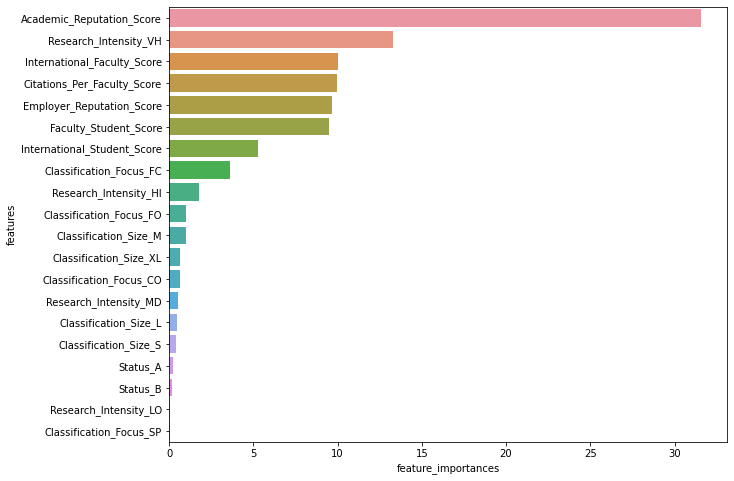

In [72]:
plot_importances(p_cols.drop(['Overall_Score'], axis = 1).columns, pipeline.steps[1][1].feature_importances_)

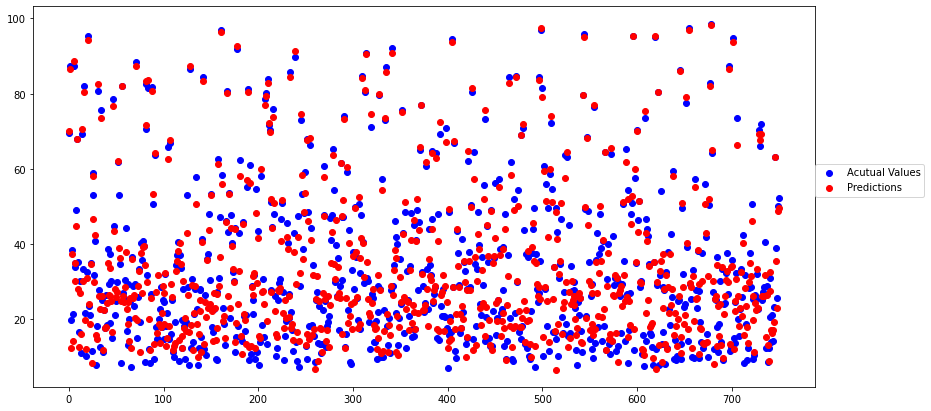

In [78]:
fig, ax = plt.subplots(figsize = (14,7))
x = np.arange(0, len(xtest), 1)
ax.scatter(x, fytest, c='b', label="Acutual Values")
ax.scatter(x, pipeline.predict(fxtest), c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

[Text(0.5, 0, 'Residuals')]

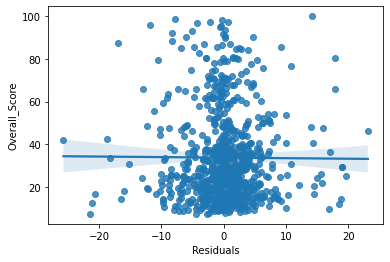

In [92]:
#residuals = fytest - pipeline.predict(fxtest)
plt.figure()
a = sns.regplot(x = residuals, y = ytest)
a.set(xlabel = 'Residuals')

In [ ]:
import pickle as pk
with open('final_model.pickle', 'wb') as f
    pk.dump(pipeline, f)

In [ ]:
parameters = {'depth' : [4, 5,6,7,8,9,10],
             'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.1, 0.2,0.3],
             'iterations':[i for i in range(100,1000,50)]}

In [ ]:
grid_cbt = GridSearchCV(estimator = cbt, param_grid = parameters, cv = 4, n_jobs = -1, verbose = 2)
grid_cbt.fit(xtrain2, ytrain2)

In [ ]:
grid_cbt.best_params_